In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
load_libs()
# set_chinese_font()

# 1. Data Wrangling

In [2]:
data = []
for year in range(2008,2018):
    file = "./data/cn/movie_%s.json" % year
    with open(file, encoding='utf-8' ) as data_file:    
        data += json.load(data_file)

In [3]:
df = pd.DataFrame(data)
df.describe()

,1_star,2_star,3_star,4_star,5_star,imdb_id,img_url,rating,ratings_num,title,url,year
count,2469,2469,2469,2469,2469,2469,2469,2469,2469,2469,2469,2469
unique,728,411,580,512,373,1738,2447,72,2203,2444,2444,24
top,0.4%,3.7%,0.0%,0.0%,3.1%,,https://img3.doubanio.com/view/movie_poster_co...,5.9,137,2012,https://movie.douban.com/subject/10831445/,2015
freq,49,16,17,65,38,714,2,64,6,2,2,347


In [4]:
df.head()

,1_star,2_star,3_star,4_star,5_star,imdb_id,img_url,rating,ratings_num,title,url,year
0,2.2%,24.4%,46.7%,17.8%,8.9%,tt0904013,https://img3.doubanio.com/view/movie_poster_co...,6.1,59,笨裁妙判 糊涂神判,https://movie.douban.com/subject/2596658/,2007
1,4.1%,18.4%,56.8%,17.1%,3.6%,tt1151318,https://img3.doubanio.com/view/movie_poster_co...,6.0,8730,错爱 塚愛,https://movie.douban.com/subject/2361528/,2007
2,6.4%,23.0%,49.1%,17.5%,4.1%,tt1606322,https://img3.doubanio.com/view/movie_poster_co...,5.8,2618,救我,https://movie.douban.com/subject/5155783/,2008
3,6.6%,10.1%,53.0%,21.7%,8.6%,,https://img1.doubanio.com/view/movie_poster_co...,6.3,291,欣月童话,https://movie.douban.com/subject/2277015/,2008
4,2.3%,11.2%,47.4%,31.6%,7.5%,tt0491044,https://img1.doubanio.com/view/movie_poster_co...,6.6,34533,文雀,https://movie.douban.com/subject/2976123/,2008


In [5]:
df.drop_duplicates('title', inplace=True)
df['rating'] = df['rating'].astype(float)
df['ratings_num'] = df['ratings_num'].astype(int)
df['year'] = df['year'].astype(int)
df['1_star'] = df['1_star'].apply(lambda x: float(x.strip('%'))/100)
df['2_star'] = df['2_star'].apply(lambda x: float(x.strip('%'))/100)
df['3_star'] = df['3_star'].apply(lambda x: float(x.strip('%'))/100)
df['4_star'] = df['4_star'].apply(lambda x: float(x.strip('%'))/100)
df['5_star'] = df['5_star'].apply(lambda x: float(x.strip('%'))/100)

df.rename(columns={'title': 'name', 'rating': 'db_rating', 'ratings_num': 'db_ratings_count',   
                   'url': 'douban_url', 'img_url':'image_url', 'imdb_id': 'movie_tt_id'}, inplace=True)

In [6]:
def name_to_rating(name):
    return {
        '1_star': 2,
        '2_star': 4,
        '3_star': 6,
        '4_star': 8,
        '5_star': 10,
    }[name]

df['mode']=df[['1_star', '2_star','3_star','4_star','5_star']].idxmax(axis=1)
df['mode']=df['mode'].apply(lambda x: name_to_rating(x))

In [7]:
df['std']=(df['1_star']*(2-df['db_rating'])**2+df['2_star']*(4-df['db_rating'])**2+df['3_star']*(6-df['db_rating'])**2+ \
df['4_star']*(8-df['db_rating'])**2+df['5_star']*(10-df['db_rating'])**2)**0.5

# Deviation against mode
df['std2']=(df['1_star']*(2-df['mode'])**2+df['2_star']*(4-df['mode'])**2+df['3_star']*(6-df['mode'])**2+ \
df['4_star']*(8-df['mode'])**2+df['5_star']*(10-df['mode'])**2)**0.5

In [8]:
df['avg']=df['1_star']*2+df['2_star']*4+df['3_star']*6+df['4_star']*8+df['5_star']*10
df['diff']=df['db_rating']-df['avg']

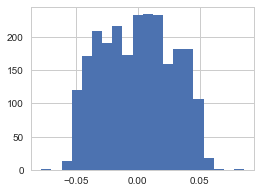

In [9]:
df['diff'].hist(bins=20)
plt_configure(figsize=(4,3))

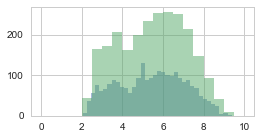

In [10]:
bins=linspace(0,10)
df['db_rating'].hist(bins=bins, alpha=0.5)

bins=arange(0,10,0.5)
df['db_rating'].hist(bins=bins, alpha=0.5, figsize=(4,2))

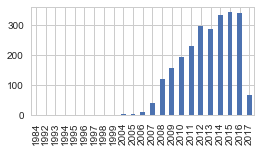

In [11]:
df['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(4,2))

# 2. General Movies

In [12]:
df = df.query("db_ratings_count > 5000")
df.describe()

,1_star,2_star,3_star,4_star,5_star,db_rating,db_ratings_count,year,mode,std,std2,avg,diff
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.00000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,0.094859,0.154929,0.370945,0.262578,0.116699,6.302065,70608.761716,2012.28753,6.195393,1.768833,1.933008,6.302718,-0.000653
std,0.147688,0.114138,0.133572,0.149890,0.115289,1.334379,85004.361287,3.10724,1.805295,0.238172,0.385539,1.334216,0.028912
min,0.001000,0.003000,0.012000,0.004000,0.008000,2.300000,5005.000000,1984.00000,2.000000,1.168114,1.209959,2.284000,-0.058000
25%,0.010000,0.050000,0.274000,0.130000,0.039000,5.400000,14380.500000,2010.00000,6.000000,1.605304,1.697056,5.444000,-0.025000
50%,0.030000,0.131000,0.394000,0.255000,0.074000,6.400000,38571.000000,2013.00000,6.000000,1.735972,1.851486,6.404000,-0.002000
75%,0.101500,0.248500,0.482000,0.401500,0.153000,7.300000,93177.000000,2015.00000,8.000000,1.892828,2.043037,7.300000,0.022000
max,0.942000,0.424000,0.619000,0.582000,0.676000,9.200000,709045.000000,2017.00000,10.000000,3.397793,5.154028,9.228000,0.086000


## 2.1 Overview

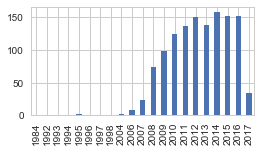

In [13]:
df['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(4,2))

In [14]:
df['std'].hist(bins=20, alpha=0.5, figsize=(4,2))
plt_configure(title='STD distribution')

plt.figure()
bins=arange(0,10.5,0.5)
df['db_rating'].hist(bins=bins, alpha=0.5, figsize=(4,2))
plt.gca().set_xlim([2, 10])
plt_configure(title='Rating distribution')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQsAAACZCAYAAAA4jB+uAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEXBJREFUeJzt3XtMk1cfB/BvAavYlqm7ilgVBR2C0tXocK8gXlbnZd4x
4HDTRCNTETXOIuAlkqEy3RRRh9cEYhxDZermjCiRqQO3ztskTEcWIkIceHlnq6Mqz/uH7zoqBU4R
adHvJzGxz3kuvx7L13OeS5FJkiSBiKgBLo4ugIhaBoYFEQlhWBCREIYFEQlhWBCREIYFEQlhWDSD
hw8fIi0tDTqdDv7+/ggKCsLChQtRUlICACgtLUXPnj3r/QMAer3eapm/vz+GDBmC5ORk3L9/366a
oqOjodfrAQD79+/HgAEDhLYrKipCfn5+ne0FBQXo2bMnTCYTAKBnz57Izc21q7aaSktLkZOTY3k9
ZMgQZGRkNHp/1Hhuji7gRbB+/Xrk5OQgLi4O3bt3x61bt5CamoqpU6fiu+++Q8eOHXHq1CnL+gkJ
CWjTpg3i4uJq7Ss0NBSrVq0CAPz9998oKipCUlISrly5grS0NMhkMrvrGzlyJEJCQoTW/fjjjzFj
xgy8/fbbNts1Gg1OnTqFtm3b2l2HLbGxsfD398ewYcMAAFlZWXB3d2+SfZN9GBbNYN++fVi6dKnl
B9LLywtffPEFBg4ciJycHEyYMAGvvvqqZX25XI42bdpYLavZVnN5586d0blzZ4wfPx4nTpzA0KFD
7a6vTZs2aNOmTSPeWW1P1tfUOnTo8Mz2TfXjNKQZyGQy5Ofn4+HDh5Zl7u7uyM7OxvDhw596/716
9YJWq8XRo0frXOefY/Xt2xexsbEwm82WtienIampqQgJCUFAQADGjRuHkydPAgAiIyNx/fp1rFq1
CpGRkZbp0+bNm9G/f3/MnDmz1jQEAC5evIgxY8YgICAAkZGRKC4utrQ9OU2pub1er8fZs2exc+dO
DBkyBID1NESSJGRkZECn0yEgIABjx4611Ao8nratWLECer0eGo0GQUFBSE1NbWw3v/AYFs1gxowZ
2L9/P0JCQqDX63HgwAFUVlaiS5cuUKlUTXIMHx8f/P777zbb8vPzERcXh+nTp+PAgQNQqVR1nkfI
ycnBjh07kJSUhCNHjiAkJAQxMTEwGo1ISUnBG2+8gYULFyIlJcWyTV5eHjIzM/HJJ5/Y3Gd6ejrm
zJmD/fv3Q6FQYO7cuaiurm7wPcXFxUGj0SA8PBxZWVm12tPS0rBhwwZER0fj4MGDGDZsGKKiolBU
VGRZJysrC56envjmm28wffp0bNy4EYWFhQ0em2pjWDSDWbNmYePGjfDx8cHhw4eh1+sRHByMVatW
4dGjR01yDA8PDxiNRptte/fuxdChQxEREQFvb2/ExsbC29vb5rqlpaVo1aoVPD094eXlhTlz5iAl
JQVubm5o164dXF1doVAo0K5dO8s206ZNQ9euXeHj42NznzNnzsSIESPg4+ODTz/9FNeuXav3JOk/
VCoVWrVqBXd391rTD0mSsGvXLsyePRujRo1Ct27dMG/ePAwcOBDbtm2zrKdWqxEdHQ21Wo1Zs2ah
Xbt2uHTpUoPHptoYFs1Ep9Nh9+7dKCgowNatWzF8+HBkZGRgx44dTbJ/k8kEpVJps+3q1avo3bu3
5bVMJkNAQIDNdceMGYP27dtDp9Nh/Pjx2LJlC7p27VrvOQ0vL696a+vbt6/l7x06dECnTp1w5cqV
erdpyK1bt3D79m0EBgZaLddqtVYjLLVabdWuUCispoMkjmHxjBUVFVmuXgCPP6yhoaHYsGEDRo4c
iR9++KFJjlNYWIhevXrZbJPJZHjy4eJWrVrZXPfll1/Gt99+i127dqF///44dOgQxo0bZzW0f1JD
J0ddXV2tXldXV9d5fNGRVuvWrW0ur66utpriyOXyWuvwQevGYVg8Y9XV1cjIyMDZs2drtSmVSrRv
3/6pj3H16lX88ssveO+992y2+/r64sKFC1bL6pq3nzx5Eunp6Rg4cCBiY2Px/fffQ6VSIS8vr9H1
1QyaGzduoKysDD169ADwOLRqngy9du2a0D6VSiVee+01nDt3zmr5uXPn6pxi0dPhpdNnzM/PD+++
+y7mz5+PhQsXYsCAATCZTDhz5gwOHTqEXbt22bU/s9mMiooKAEBVVRUKCwuRnJyM0NBQDBo0yOY2
06ZNw9SpU7Fr1y4MHjwY2dnZKCoqstzsVZMkSVi3bh1eeeUVaDQaXLhwARUVFZZpi0KhQHFxMW7e
vClc86ZNm+Dp6YlOnTohKSkJvXv3tlx9CQgIwJ49e/Dmm2/izz//xM6dO622VSgUKCkpwY0bN/D6
669btf1zLsjT0xN+fn44fPgwTp8+jfT0dOHaSBzDohmsW7cO27dvx+7du5GYmAgXFxf07dsX27dv
h0ajsWtfubm5+M9//gMAaNu2LTp16oTJkyfjo48+qnObwMBAbNiwAevWrcPnn3+O4OBgjBo1yua6
gwcPxpIlS7BhwwaUl5ejY8eOSEhIQFBQEIDHwbN69WqcO3cOmzZtEqo5KioKa9euRXl5OYKCgrB2
7VpL27Jly5CQkICxY8eiR48eWLRoEebNm2dpDw8Px5IlS/D+++/jxx9/tNrvBx98gHv37mHt2rW4
efMmfH19sXXrVvTr10+oLrKPjN+URUQieM6CiIQwLIhIiEPPWRgMBkcenuiFptVq7Vrf4Sc47S24
ORkMBqeury4tse6WWDPQMutu7H/SnIYQkRCGBREJYVgQkRCHn7N4Xuw5WvezEzVF6Gw/v0Hk7Diy
ICIhDAsiEsKwICIhDAsiEsKwICIhDAsiEsJLp82Ml1ippeLIgoiEMCyISAjDgoiE8JxFA0TPMRA9
7ziyICIhDAsiEsKwICIhDAsiEsKwICIhDAsiEsKwICIhDAsiEsKwICIhDAsiEsKwICIhDAsiElLv
g2QPHjzA0qVLcf36dZjNZkRFRaFHjx7Q6/WQyWTw8fHB8uXL4eLigszMTOzduxdubm6IiopCaGho
c70HImoG9YbFwYMH0a5dOyQnJ+POnTsYN24cevXqhZiYGAwYMADLli3D8ePHERgYiPT0dOzbtw9V
VVWIiIjAO++8A7lc3lzvg4iesXrDYsSIEdDpdAAASZLg6uqKy5cvo3///gCA4OBgnD59Gi4uLtBo
NJDL5ZDL5VCr1SgqKkKfPn2e/TsgomZRb1goFAoAgNFoRHR0NGJiYrBmzRrIZDJL+927d2E0GqFS
qay2MxqNQgU09te/N5eysjKHHNdgMD3l9s7dr7a0xJqBllu3vRr88pvy8nLMmTMHERERGDNmDJKT
ky1tJpMJHh4eUCqVMJlMVstrhkd9tFptI8puHgaDAZ6eng45tlbb+C/sNRgMTt2vtrTEmoGWWXdj
w63eqyGVlZWYMWMGFi9ejEmTJgEA/Pz8UFBQAADIy8tDv3790KdPHxgMBlRVVeHu3bsoLi6Gr69v
owoiIudU78hi69at+Ouvv7B582Zs3rwZABAXF4fExESsX78e3t7e0Ol0cHV1RWRkJCIiIiBJEhYs
WIDWrVs3yxsgouZRb1jEx8cjPj6+1vKMjIxay8LCwhAWFtZ0lRGRU+FNWUQkhGFBREIYFkQkhGFB
REIYFkQkhGFBREIYFkQkhGFBREIYFkQkhL9F3UmJ/vb2CF3jHzgjsgdHFkQkhGFBREIYFkQkhGFB
REIYFkQkhGFBREIYFkQkhGFBREIYFkQkhGFBREIYFkQkhGFBREIYFkQkhGFBREIYFkQkhGFBREIY
FkQkhGFBREL4tXotnK2v3ysr+y9+q7Rezq/fo6fFkQURCREKiwsXLiAyMhIAUFJSgvDwcERERGD5
8uWorq4GAGR

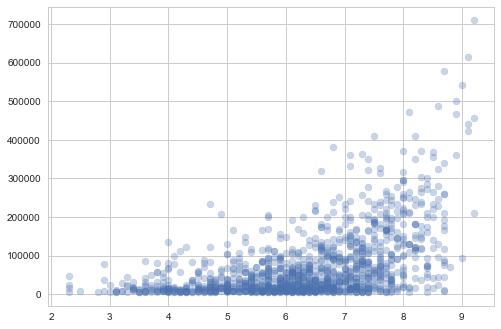

In [15]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df.db_ratings_count, alpha=0.3)

## 2.2 standard deviation

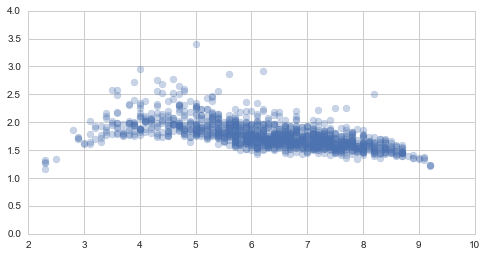

In [16]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3)
ax.axis([2,10,0,4])
plt.gca().set_aspect('equal')
plt.show()
# turn_scatter_into_interactive(fig, scatter_plot, df, './all.html', show_ratings_num=False, click=True, show_distribution=True)

In [17]:
movie_list(df.sort_values(by='std',ascending=False))

## 2.3 Ratings Number Comparison (Converge)

In [18]:
for num in [0, 5000, 20000, 50000, 100000, 200000]:
    sub_df = df.query("db_ratings_count > @num")
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.3)
    ax.axis([2,10,0,4])
    plt.gca().set_aspect('equal')
    plt_configure(title = num, figsize=(3,2.5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAACeCAYAAAB3j0V0AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAH7lJREFUeJztnWmQnFd573/nvEuvsy9aLcmSrBh8AYONXFA2NpiLnVRR
JCnfxBFlKsWXhLiKOGwGF5i1ALOFJFWOjfMhtwyEJIUhvjfccLM4AcfEGBU2tq+wkKzFs8/09PT6
7ufcD+/MaCSNembkWXrk86tSlaan+8zT3ef/nuc8z3meV2itNQaDYVHkRhtgMLQzRiAGQwuMQAyG
FhiBGAwtMAIxGFpgBGIwtMAIpE2IoojPfOYzXHfddVx33XV86UtfIkmSjTbrFY+90QYYUr72ta/x
+OOP8+CDD9JsNvnIRz5CsVjkj/7ojzbatFc0wiQKN54gCLjuuuv46le/ys033wzA9773Pb785S/z
+OOPI6VZ6DcK88m3AUeOHMHzPA4ePDj/2LXXXkupVOL06dMbaJnBCKQNGB8fJ5fL0dHRMf/YwMAA
AGNjYxtllgEjkLbA8zwymcxZj7muC0AYhhthkmEWI5A2IJvNnieEuZ9zudxGmGSYxQikDdi6dSvN
ZpN6vT7/2OTkJABbtmzZKLMMGIG0BVdeeSW5XI7Dhw/PP/azn/2M/v5+du3atYGWGYxA2oBsNstt
t93GZz7zGQ4fPsxPfvITvvrVr/Ke97xno017xWPyIG1CEAR87nOf4wc/+AGu6/Jbv/VbfOhDHzI5
kA3GCMRgaIG5PBkMLTACMRhaYARiMLTACMRgaIERiMHQAiMQg6EFRiAGQwuMQAyGFhiBGAwtMAIx
GFpgBGIwtMAIxGBogRGIwdACIxCDoQVGIAZDC4xADIYWGIEYDC0wAjEYWmAEYjC0wAjEYGiBEYjB
0AIjEIOhBUYgBkMLjEAMhhYYgRgMLTACMRhaYARiMLTACMRgaIERiMHQgmUJpFQqceONN3L8+PG1
tsdgaCuWFEgURdx7771ks9n1sMdgaCuWFMh9993H7bffzuDg4HrYYzC0FXarXz7yyCP09vZyww03
8I1vfGNZAy68z57B0G5cc801K3p+yztMvfvd70YIgRCCI0eOsGfPHv7yL/9y/ib3i3H48OEVG7ER
GDtXj81gI1ycnS1XkG9961vz/7/jjjv41Kc+1VIcBsOlhgnzGgwtaLmCLOThhx9eSzsMhrbErCAG
QwuMQAyGFhiBGAwtMAIxGFpgBLJKJErjBzGJumBaybAJWXYUy7A4WmuOD88wWfaIE41tCQZ6cuzb
0Y0QYqPNM7xMzAryMjk+PMNU2ceSkoxjYUnJVNnn+PDMRptmWAWMQF4GidJMlj2kPHulkFIwWfaM
u3UJYATyMoiihDhZXARxoomiZJ0tMqw2RiAvA8exsK3F9xm2JXAca50tMqw2RiAvA0umG3J1jiul
lGagJ4clzSZ9s2ME8jLZt6Ob/p4siVIEUUKiFP09Wfbt6N5o0wyrgAnzvkyEEOzf2cPl27uJogTH
sczKcQmxpECSJOHjH/84J06cQAjBpz/9aQ4cOLAetq0ZidKEsSJRetUmsyUFVsZcby41lnSxHnvs
MQC+853vcNddd/Gnf/qna27UWqG15thQmZ8+P8rRYZ+fPj/KsaEyLYoq2wqTrV9/lrzkvf3tb+em
m24CYGRkhM7OzrW2ac1YmNRzLDGf1IMZ9u/sWVdbEqWX7ZKZbP3G0bImfSF33303//zP/8yf//mf
c/3111/wee3atEEpzQvDPovNRaXh13Zkz0v4rQVaa0anIyrNZN7F68pbbOt1LjjZR0ohlWaMXPB7
pTVdeZvtfe6a23wpsapNG85lcnKS3/md3+Ef//Efyefziz6nXQv4/SDmqSPjZGZzE8eOHWP//v0A
BFHCG1+1BcexFr2qr+RqvxTHhspMlf2zxKiUpr8nu+gq9tRTPyPObseS53vDiVIcvGrbhgcF2vU7
P5dVb9oA8P3vf5/x8XH+4A/+gFwuhxACuciX1e44joUUEEYJtnW2/baE0+NVShWfONFICd2FLAd2
d3NqrLpqrs3c0ZRzJ/vc0ZTLt3efN9ljpYkTjbXIRz6XrTfBgbVjyU/2He94Bx/72Md497vfTRzH
3HPPPZuuy6LWmhMjM4yXm8xUA2xLUqlF7NMarcGPEqYrAVIISpUm1UZIHJf5z18M09+TY0d/kYwj
UUozMtFAKc2BXb0rtmPuaMpKJrstBZhs/YaxpEDy+Tx/9md/th62rBlzm/Md/UWkEFQbITUvYXiy
zlX7+lAzCikFI1N1qo0QKQS2LRkvNcg4NiPUEUJSrQckSnN8uIwfJbx6T995q1ErLuZoipzN1i/m
lpls/dpzyazNc/sEaUlUoub3C+e6Ndv7i2zp0xCU2NKXZ+dABxPTHkJqKvUArQGZTsA40WitOT1a
o7szgxSCWiOg2gjxgmGOnipz9YGBZblcc/b1dWXT1WoFkz3Nyi8exTKsLZteIHMh0InpJsOTDRpe
SCHnsHOgyEBvnh39xfPcGksIbClQChBgSRger/HSeB0pQAjI2BZSaISEajMds94MmSg3CWOFkIKZ
eoAQqQ1XXLa4y3VeiFamLl3GsUgUy5rsmy1bv5pBjY1m0wtkzn2aKPt4QYyUklojYtRqIkS6b2jl
1mRdmyBKqHkRloSGHxOGCbFS2FISD1WoNAMafsTEdBOtoZCz8YOYXMamUgt59niJvTt6Fp0MR18q
Mz7VxHEtMk6q0pyQ9HRl2L2lc0WTqN2z9ZdivqZ9P+1lMOc+CQSVuk+lHtL0I5SCsekGAtBa0dud
o3yuW6NTtwYg61j0dGQ4PV7F8yMsS1LIOiRK4UUxXpCQaIgThWNJhBAEUYLSYNuScjXAD2MKWWd+
/DhRHHlxmqeOjJIocB1JVzHDtr4CUgqmKz77dy4uqs3KwkTs3Iq9UYnY1WJTC2QuKiTQlCo+YZQg
hMCyIEmgXA2IE8XVBwaxpGC81MQPE7KuRVfeZs+2LmqNgDDWbO0tMLPFZzrv4gcJWmmmKk2KBRcp
QM8e7xBCEMXpGII0yZioZP7I+9xV9JmjkxwfqjA6XSdj23QWXGaqAVprdgx0XHIh2osJYW8GNvW3
MxcVUhqCMD4rPyNlenWvN0PCJD2YyOz+Ik40L00FPPHMMFoITozMUMhlUErT25GFDs1U2SMIFRAR
xoribB7FD2NsJenpsEiUYmisSjZr8/QLE/R2Z7GloDQT8NJ4jUo9wPMTmjqh4Ud0FVw0mq39xQtG
rRbz3zeDT38xIezNwOazeAFzBUsjEw0yrj2/gmityWVsyhWfMEl49EfHiGNNd4fLVMXn5EiViak6
QzMn2bu9h55Oh9PjFSbKPgXXphlGaJ2KzLFl6hLVfTw/PSioAw1oejsyDPbkKOYzHH1phsavQsIg
Yde2TsZKTZTWuLYkShRxktaLjE17BH7Mzq3Fsyb7Yv57f3eW4amA8PnRtvfpL9Xqyk0tEEhDoInS
9HS4lGshQRCTydgopdKNtxCcHK3hWJJfnixjWRDGGtuSRLFiolxnumYRhDHVuo9nWXhRTN61sS2J
1hoviNNTtFqjZk/m1OohUki29mmOni5RqYdEcSqCl8ar6Z6kkMV1LQghiBSJgiSJ6enKzEet5laH
0+NVpivBWf77s8dLDE0EbN2ZPvZyE5Ur4dxVa6lVzLpE8zWbXiBKw+4tnejXaCamPaQQ+GHMs8cm
cSxJ1rXxghgNzNQDEqWQUhIECYkI06x6o872viJb+4o4lmBixkcI8IKIYt4hjhMSrYljjSBdWSxL
opKEY0PTVJsxoIkiTZwo6s06GsjVQrIZm6xj0VF06enIkHWt+Q3rsaEyk2WPMFa8ODRDR95la38B
NAgpqNZDGn5

## 2.4 Time Shift

In [19]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3)
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(figsize=(4,4))
fig, ax = plt.subplots()
sub_df=df.query("db_ratings_count > 20000")
scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.3)
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(figsize=(4,4))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQgAAAD3CAYAAADhRcqHAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvVmMZVl19/nb+4x3intjyrlmoOBzWQJnN/p4AgrLn5GN
XK0yLoMlLMGDhWwh/GRAZSQ/IcSDZUuuxg9tWfKLJ6ktWrLkRgZZrW61gWwwUNRAFVU5RsZ45zPv
vfthn3vzRmbcyMjIoTIzzk9CojIi7j034ux19l7rv/5LGGMMFRUVFXsg3+kLqKiouH+pAkRFRcVc
qgBRUVExlypAVFRUzKUKEBUVFXNx7/Ubnjt37l6/ZUVFRcnZs2dv6fvveYCAW7/IB4lz587d1c+n
tOF7L6/hyBs3f0prPvhLJ3GkuGvvf7c/3zvNw/z5DvNwro4YDxh5rijU3tKVQhnyXN3jK6p4mKkC
xAOG5zm4zt47BNcReJ5zj6+o4mGmChAPGI4UrC7W0Hr3LkJrw+pi7a4eLyqOHlWAeAB56nSHlcUQ
pTVprlBas7IY8tTpzjt9aRUPGe9IkrLi9hBC8K4zizxxqkOeKzzPqXYOFXeFKkA8wDhS4ATVn7Di
7lEdMSoqKuZSBYiKioq5VAGioqJiLlWAqKiomEsVICoqKuZSBYiKioq5VAGioqJiLlWAqKiomEsV
ICoqKuZSBYiKioq5VAGioqJiLlWAqKiomEsVICoqKuZSBYiKioq5VAGioqJiLlWAqKiomEsVICoq
KuZSBYiKioq5VAGioqJiLlWAqKiomEsVICoqKuZSBYiKioq5VAGioqJiLlWAqKiomEsVICoqKuZS
BYiKioq5VAGioqJiLlWAqKiomEsVICoqKuZSBYiKioq53DRAKKX48pe/zO/+7u/yqU99itdff33X
17/zne/w/PPP88ILL/CP//iPd+1CKyoq7j03DRDf/e53Afj7v/97vvjFL/Lnf/7n06/lec7XvvY1
/uZv/oa/+7u/4x/+4R/Y2tq6e1dbUVFxT3Fv9g2/+qu/ykc+8hEArly5wsLCwvRrb775Jo8++ijt
dhuAs2fP8v3vf5+Pf/zj+77muXPnbuOS73+qz/dg87B/vlvhpgECwHVd/uRP/oRvf/vb/OVf/uX0
30ejEa1Wa/rfjUaD0Wh009c7e/bsIS71weDcuXPV53uAeZg/32EC34GTlF//+tf5t3/7N/70T/+U
KIoAaDabjMfj6feMx+NdAeOoobQhKzRKm3f6Uioq7gg3DRD/8i//wl//9V8DUKvVEEIgpf2xp556
ivPnz9Pr9ciyjB/84Ad84AMfuLtXfB9ijOGNS12+9/Iar19O+N7La7xxqYsxVaCoeLC56RHj137t
1/jyl7/M7/3e71EUBV/5ylf49re/TRRFvPDCC3zpS1/ic5/7HMYYnn/+eY4fP34vrvu+4s3LPba6
CY6UeI7AkZKtbgL0eNeZxXf68u4qShvyXOF5Do4U7/TlVNxhbhog6vU6f/EXfzH3688++yzPPvvs
Hb2oBwmlDZvdGEfu3oxJKdjsxjxxqvNQLhxjDG9e7rHZjSmUwXUEq4s1njrdQYiH7/MeVSqh1G2S
54pC7X2UKJR9uj6MzO6aAs+Z7prevNx7py+t4g5SBYjbxPMcXGfvJ6brCDzPucdXdPeZ7JrkdTuj
ya6pStI+PFQB4jZxpN1a6+sWhdaG1cXaQ3m8OKq7pqNIFSDuAE+d7rCyGKK0JlcGpTUriyFPne68
05d2VziKu6ajyoGEUhX7I4TgXWcWeeJUB6LLfPCXTj4wO4fDVCEmu6atbrLrmPEw75qOKlWAuIM4
UuC78oFYILdbhbC7o71/vuLhoQoQR5TZKoRTHjRvRbsxu2uqdBAPL1UO4ghyJ6sQjhSEgVsFh4eU
KkAcQaoqRMVBqQLEEaSqQlQclCpAHEGOonaj4nBUAeKIMqvdSHP10Gs3Kg5HVcW4z7hX3ZFVFaLi
IFQB4j7hneqOdKTACarboGJvqiPGPURpQ5IWe5YRq+7IivuR6tFxD7jZ7uCoekpU3P9UO4h7wM12
B5UuoeJ+pQoQt8l+x4bJ12+mWqx0CRX3K9UR45DMOzZcb1Q72R04e4Tiye4gDNyqO7LivqQKEIdk
XrPT5k6+6/sOujuouiMr7keqAHEI9ksq9iOF0mb61J/nnZArTacRTP+70iVU3I9UAeIQ7HdsmAid
ZrUFu3cHms1eDAaU0nzv5bVdFY1Kl1BxP1HdiYdgv2ODI29MKs7uDl49v40jJK57LboclRkaFQ8e
VRXjEOzX7NSu7380GIyyXcEBKjfoivuXKkAcknnNTieXvLk/c6t6h5uVUCsq7jbVEeOQzEsqnluf
v3s4aEWjmlpVcb9Q7SBuk1uxXDuoD0PVl1Fxv1AFiHvMzXwYqqlVFfcT1RHjHnMzvcNBlJdVGbTi
XlHdae8Q8/QOe+UptDYUSiMFVV9GxT2lChD3GbPKSyFgbTtiMEoplKazEPDWlV6VrKy4Z1Q5iD2Y
LS++E6XGSZ7i8uaInX4MApbaIadXmlWysuKeUu0gZpgtL+aFZqtnF+dqp4bryNsuNR7Ub1IIwROn
OqzvRBxbrOO4Eqd8TyE4lInMvfK6rHi4qALEDLPlxfVBzCi2nZlSCE6VT+/DSKIPo2vIc4XWEHgO
yhiyXE0Dxa0kKytNRcXtUAWIktkOTa0Ng1E6LTUOxhnHl22H5mGe3oeZg+l5Dq6EK1sjBuMMpQyO
I1ho+BxfrB04WXm7MzgrjjZVDqJkVgZdKL0r56CUQRW6/NqtWcAdVtfgSEGSK/qjFCkEniuRQtAf
pSS5OlCAqjQVFbdLFSBKZsuLriN3LUDHEThlg9WtWsAd1m9SaUPgObSbIVob8kLbZrBmaI8dB1jc
lddlxe1SHTFKrjd2WWgGDMYpAAsNH0eIQ1nAzeu/0NqgtUZep4iaJBOVNuTKsNIOrZWdNriOREpB
mqsD5SAqr8uK26UKEDPMGrssLQRorUHActtKow9jAXd94DHGsLYd0R8m1Gsu5165yupijSdPtfnF
lf7UVGZjJ+LC+oB2I8R1JQsNn5PLDeDgi3uem1XldXlwjnr1pwoQM+wlgwZu+waZDTyXNkZESU67
FXByuYEQgq1uwsX1ITXfsxWUnYhxUiCFZDjOWO7UGIwzAE4sNW5pcVdel4ejqv5Y9g0QeZ7zla98
hcuXL5NlGZ///Of52Mc+Nv363/7t3/JP//RPLC0tAfBnf/ZnPPnkk3f3iu8BszLoO5HImwSeR0+0
yfIr+L4z1TVMOL824OnHl1HGMBhnSCFYWgjZ7qcopdEGesOE9z2xdEuLu/K6PBxV9ceyb4D41re+
RafT4Rvf+Aa9Xo/nnntuV4D46U9/yte//nWeeeaZu36h95q78QTRSiOluCE4FEqTFdcqJUoZpCsQ
QtBu+jxxqo2UdgLXY8cXDvz+12+Pqyavg1FNOruGMNcPcphhPB5jjKHZbNLtdvnt3/5t/v3f/336
9Y9//OO8+93vZnNzk4985CP8wR/8wU3f8Ny5c3fmyu8yV7Yz+lGBnFmM2hjadZdTy/6hXlNrw2uX
E66/t7QxXNrKOLNiX/fydj79HmMMp5Z9pBBoA0+fDm8oW16PMYa1nXyXw3a77nByyTtS2+PDkhWa
1y8neHskeHNleM/pEN99MAuAZ8+evaXv3/eR0mjYpNhoNOILX/gCX/ziF3d9/Td+4zf49Kc/TbPZ
5I/+6I/47ne/y0c/+tE7fpH3GqUN2ctrHJc33gRKa97/SyfnPkHOnTu37+dbPNndM2l4+pGcmu8h
paC5OJrmHBYaAadWGmhtWFkMD7S9feNSlyJIWMXuTtxyj9w54M/vx80+34POuXPn+OD//D9Bfe2G
HQTYv/8H9/n

In [20]:
for year in range(2008,2017):
    sub_df = df.query("year == @year")
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.3)
    ax.axis([2,10,0,4])
    plt.gca().set_aspect('equal')
    plt_configure(title=year, figsize=(3,2.5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAACeCAYAAAB3j0V0AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAF5VJREFUeJzt3XmMVfXdx/H37yx3m7mzwQADCiKV0u3RR6xocKG1rbaJ
aTCkRQxN4z+tNbE0SqiUUltsXf7QqpEi+IcGtbZNTYtNY6ON6SKJFatWKNVHUGSGGWa7s9z1LL/f
88dlpgMM5wLOcmG+r8SEueecO98zns/5Lefce5QxxiCEGJU12QUIUc0kIEJEkIAIEUECIkQECYgQ
ESQgQkSQgIyTjo4ObrvtNpYsWcLSpUu588476e/vB8D3fX7yk5+wZMkSlixZwv33308YhsPbVlqe
zWZZv349l112GZdddhnr1q0jk8lM+D5OCUaMuSAIzPLly83NN99s9u7da9566y2zfPly861vfcsY
Y8y9995rvvjFL5o33njDvPLKK2bp0qXm0UcfHd6+0vI77rjDrFixwuzZs8fs3r3bLF++3HznO9+Z
8P2cCiQg4+Dtt982CxcuNJ2dncOv7dq1a/i1Cy+80Lz00kvDy5577jlz+eWXmzAMTbFYjFxujDEX
X3yxef7554eX79ixw1x00UUTsGdTj3SxxsGcOXPYtm0bzc3Nw68ppQBoa2ujUChw6aWXDi+75JJL
6Onp4cMPP2Tv3r2RywEaGxt5/vnnGRwcJJvN8oc//IFPf/rTE7R3U4sEZBw0NjZy1VVXHfXaE088
wbx58zh8+DDJZJJ0Oj28bChIHR0dFZcDbNq0iT179vDZz36WSy65hP379/PAAw+M925NSRKQCbB1
61ZefPFFfvCDH1AoFIjH40ctj8ViAHieV3E5wP79+5k/fz5PPvkkTz75JOl0mrVr12Lktrox50x2
AWe7Rx99lIcffpiNGzdy9dVX88ILLwwf6EOGfk4mkyQSicjlH374IXfffTcvvPAC8+bNA+CRRx7h
mmuu4R//+AdLliyZgL2aOqQFGUc//elPeeSRR7jrrru46aabAJg1axb5fJ5sNju8XldXFwAzZ86s
uHz37t0kEonhcEB5zNPY2MjBgwcnYremFAnIOHnooYd46qmnuOeee7jxxhuHX1+0aBHJZJLXX399
+LVdu3Yxffp05s6dW3H5zJkzyefztLa2Di/v7u6mr6+PuXPnTszOTSWTPY12NtqzZ49ZtGiRuf/+
+01nZ+dR//m+bzZt2mQ+//nPm127dpmdO3eapUuXmi1btgxvH7U8CAJzww03mJUrV5q3337b7Nmz
x6xevdqsWLFieBpYjB1ljIzsxtqDDz7Ili1bRl32/PPPM2/ePO6++27++Mc/EovFWL58OXfccQeW
VW7QS6VS5PLu7m7uvfdedu7ciTGGpUuXsn79epqamiZsH6cKCYgQEWQMIkQECYgQESQgQkSQgAgR
QQIiRAQJiBARJCBCRJCACBFBAiJEBAmIEBEkIEJEkIAIEUECIkQECYgQESQgQkSQgAgRQQIiRAQJ
iBARJCBCRJCACBFBAiJEBAmIEBEkIEJEkIAIEUECIkQECYgQESQgQkSQgAgRQQIiRISTCkhPTw9X
X301+/btG+96hKgqFQPi+z4bN24kkUhMRD1CVJWKAbnvvvtYuXIlM2bMmIh6hKgqkU+5fe6552hq
auLKK69k69atJ/WGI5+tJ0S1Wbx48SmtH/mEqZtuugmlFEop9u7dy3nnnccvfvGL4Qfbj+b1118/
5SImg9Q5ds6EGuH06oxsQZ5++unhf69evZq77rorMhxCnG1kmleICJEtyEjbt28fzzqEqErSgggR
QQIiRAQJiBARJCBCRJCACBFBAiJEBAmIEBEkIEJEkIAIEUECIkQECYgQESQgQkSQgAgRoeLdvGEY
smHDBt5//32UUvz4xz9m4cKFE1GbEJOuYgvy8ssvA/Dss8+yZs0aHnzwwXEvSohqUbEF+cIXvsCy
ZcsAOHToEHV1deNdkxBVI/Iz6SOtW7eOF198kYcffpgrrrjihOvJlzaIanbKn503p6Czs9MsW7bM
5HK5E66za9euU3nLSSN1jp0zoUZjTq/OimOQ3/3udzz22GMAJJNJlFJYlkx+iamh4hjkS1/6Enfe
eSc33XQTQRCwfv16+ZZFMWVUDEgqleKhhx6aiFqEqDrSVxIiggREiAgSECEiSECEiCABESKCBESI
CBIQISJIQISIMCUDEmqDF2hCfVL3aYop7KQff3A2MMawr62PrkyBd9uKkGqnuTHJgjkNKKUmuzxR
haZUC7KvrY/uTBHbsnBthW1ZdGeK7Gvrm+zSRJWaMgEJtaErU8Cyjm4pLEvRlSlMue5WqA3FUjDl
9vtUTZkulu+HBKHBHuWUEIQG3w+x49X55wh1uT7XtbGtj9YVHNnNDEKDYyvpZkaIPCJ832f9+vW0
tbXheR633HIL11xzzUTVNqZc18axRz8AHFvhuvYEV1SZMYZDPR7envYxO5hHdjOHThbdmSLQx8fO
aRy74s8SkV2sHTt20NDQwDPPPMPjjz/Opk2bJqquMWdb5YNLH9Ol0NrQ3Jg8pTNzVPdkaJkX6I/c
hdnX1kd/PsC2LOKu/ZHHTNLNPHWRLch1113HtddeC5TPZrZdfWfZU7FgTgNQ7l74oSHUeviMfDKC
UPPOBxn6ckW05qgzOpQP6I6eHAc7Bil6IbUpl3Oaa2luSp3yWX/4YFajH8zzZzeccncrqpvp+ZrB
XIl0Tfwjd+POJif1pQ3ZbJZbbrmFr33ta1x//fWR654JX9qgtSHQBsdSx51NR2OMob3X5/3DRbLF
ENuyqIlbNKZtjIH6lIMxhgOdJTr6PAoljWUpYo5iVoNLU51Lfcph9rTYSdfoBZp324q4o3QL/dCw
cE6CmHNqcyxaG95pK2Ip0MagNShl6MuF5IqaWQ0ujmNRn7JpaXJHDfSp/u2qzal+aUPFUWl7ezu3
3norq1atqhiO0y1iooXa8I/XdnHx4sWRZ8uhwfGHhwfw3CIZv48mS6GNIQg0qbo4c5rT+GHIoe4s
oZOlpLN4OiQIQqzAwgy6nDO3hcaGBIsWzcR1bHSoTzjg9gJNvuARj7sEsXb+7739LFr4MRzHKh+c
oUYpuPQzs0/rTN8wq5e33+slm/cItWEgW0LbsOiCNLOnp4FyCBoaE0eNSY4d3DOi9fznP/9Z9f/P
4fRO3pEB6e7u5uabb2bjxo1cfvnlp11YtTjZC4Uj1/MCzfttfdQk4wShJpv1yRd9tIaO3hwGqEvF
2N/aTxAaCl553KGUIgw0fYMl9rdl2N+qOHg4S8kPqEnGmNNcw4wRXS+tNX95o5UD7QOU/JCOnjy5
go9fyNI+cADHdpjZlEQD9bUx/vN+Lx8/rxFnRH/ppGe7lAFV3s98ySeZcIcXDYWwvStHy/RaEjEH
21KRg/uzWWRAtmzZwsDAAJs3b2bz5s0AbNu27Yz90oYTXSg8dgbnqINBGYxR5IserZ1ZYq6FUgrb
hjCEvoESpVJIySsfmGFg8ENNGGoM5b59V6aAbSmm1SdxHZtCKaAzU8RSFn7QS8u0Gl77dweHunM4
ts3BzizZvIc2hsGixuvJU/QC2ntjzJlRi6UMr/yrjf8c6OHChc2cP7ue/Yf6Tzh1OxQcy7bo7ity
TnOa0BgKBR+jIO7Y9Gc9tMkykC3SlSlQ8AJaOweZ11LHtIYkPX0FnGPGoEPjIafC4H4sp6knWmRA
NmzYwIYNGyaqlnE1NOi1j/nKomMHvceuZzsW9pFxQNHzcZ3YcGtjWZSXKUMy4eD5mlDrI90gBabc
HfJ9TckYhg4NSyn6Bwt09ebozORpqk/x3sFeGtJx5jTX0DdYDmepFJIvhliuxrFs+nMedGbpGyxR
k4jRnSngBYb

# 3. Popular Moives

In [21]:
df = df.query("db_ratings_count > 20000")
df.describe()

,1_star,2_star,3_star,4_star,5_star,db_rating,db_ratings_count,year,mode,std,std2,avg,diff
count,817.00000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,0.06447,0.127531,0.366273,0.301857,0.139875,6.650184,102727.870257,2012.269278,6.631579,1.724049,1.866844,6.650308,-0.000125
std,0.11600,0.107005,0.131270,0.144137,0.126746,1.244548,90480.866519,3.184437,1.645741,0.206870,0.302528,1.245749,0.028671
min,0.00100,0.003000,0.017000,0.004000,0.009000,2.300000,20249.000000,1992.000000,2.000000,1.168114,1.209959,2.308000,-0.054000
25%,0.00700,0.036000,0.266000,0.179000,0.049000,5.900000,40659.000000,2010.000000,6.000000,1.578987,1.666133,5.868000,-0.024000
50%,0.01900,0.089000,0.384000,0.320000,0.094000,6.800000,71404.000000,2013.000000,6.000000,1.691863,1.815489,6.770000,0.000000
75%,0.06500,0.210000,0.475000,0.429000,0.188000,7.600000,133184.000000,2015.000000,8.000000,1.839522,1.980909,7.572000,0.024000
max,0.92900,0.400000,0.595000,0.569000,0.676000,9.200000,709045.000000,2017.000000,10.000000,2.651356,3.793152,9.228000,0.086000


In [22]:
movie_list(df.query("db_ratings_count > 100000").sample(frac=0.03).sort_values(by='db_rating',ascending=False), len=8)

In [23]:
df['std'].hist(alpha=0.5, figsize=(4,2))
plt_configure(xlabel='STD', ylabel='Frequency')
plt.figure()
bins=arange(0,10,0.5)
df['db_rating'].hist(bins=bins, alpha=0.5, figsize=(4,2))
plt.gca().set_xlim([2, 10])
plt_configure(xlabel='Rating', ylabel='Frequency')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARMAAACZCAYAAAAM9d6yAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEOdJREFUeJzt3XtMU2cDBvCnLRSU4mXDGRVwoiAzxqmoaBSdwoLXoIJV
mgkZzg2icTBiUKcom1MXmG4xEofZMocyZahTN4MGxWAwEu3mdd43NVo14gVtkdt4vz8MnSiUU3dO
aT+e31/0tD19OB4e33OtSgghQET0H6lbOwAR/X9gmRCRLFgmRCQLlgkRyYJlQkSyYJkQkSzcWjvA
qzAaja0dgajNCgkJaXK6S5YJ0Pwv9KqMRqPs83xVzpKFOZijqc9uDjdziEgWLBMikgXLhIhk4bL7
TKhpefsvyDYvk6kCTrCLgFwERyZEJAuWCRHJgmVCRLJgmRCRLFgmRCQLlgkRyYJlQkSyYJkQkSxY
JkQkC5YJEcmCZUJEsmCZEJEsWCZEJAuWCRHJgmVCRLJgmRCRLHhzpFbW1M2MTKYKXCyX7yZHRI7A
kQkRyUKRkUltbS2WLFmCW7duoaamBklJSejTpw8WLVoElUqFwMBALF++HGq1Gvn5+di2bRvc3NyQ
lJSEsWPHKhGJiBSmSJns2bMHnTp1QmZmJh49eoSpU6ciODgYycnJCA0NRXp6Og4ePIiBAwciNzcX
O3bsQHV1NQwGA0aOHAmtVqtELCJSkCJlMn78eERGRgIAhBDQaDQ4d+4chg0bBgAYPXo0SktLoVar
MWjQIGi1Wmi1Wvj7++PChQsYMGCAErGISEGK7DPx8vKCTqeD2WzGggULkJycDCEEVCqV9fknT57A
bDbD29u70fvMZrMSkYhIYYodzbl9+zbmzZsHg8GAKVOmIDMz0/qcxWJBhw4doNPpYLFYGk1/vlxs
UeL7hlvjO4xNpopmppscnKRpzvK9zszRmLPkeJ4iZVJeXo6EhASkp6djxIgRAIB+/fqhrKwMoaGh
KCkpwfDhwzFgwAB8/fXXqK6uRk1NDa5evYqgoCBJn/H/8l3DTR0CNplM6N69u8OzNJWjrX+3LnO8
/NnNUaRMNm7ciMePHyM7OxvZ2dkAgE8//RQrV67E2rVrERAQgMjISGg0GsyePRsGgwFCCKSkpMDD
w0OJSESkMEllMnfuXEyfPh0RERFwd3dv8fVLly7F0qVLX5q+ZcuWl6bp9Xro9XopMYjIiUnaAfvh
hx/iyJEjiIyMREZGBk6fPq10LiJyMZJGJkOHDsXQoUNRVVWFwsJCLFiwADqdDjExMTAYDDwvhIik
7zMpKyvD7t27UVpaitGjR2PixIkoLS1FUlISvvvuOyUzEpELkFQmY8eOha+vL6Kjo5Geng5PT08A
wLBhwxATE6NoQCJyDZLKZPPmzfDy8sLrr7+OqqoqXL9+HT179oRGo8GuXbuUzkhELkDSDtjDhw/j
gw8+AADcv38fiYmJ2L59u6LBiMi1SCqT/Px8bN26FQDQo0cP7Ny5s8nDvETUdkkqk9ra2kZHbKSc
a0JEbYukfSYRERGIj4/HhAkTAAAHDhzAuHHjFA1GRK5FUpksXLgQhYWFOH78ONzc3BAXF4eIiAil
sxGRC5F8nknv3r3h4+MDIQQA4Pjx4xg6dKhiwYjItUgqk4yMDBQXF8PPz886TaVS4ccff1QsGBG5
FkllUlpaisLCQuvJakREL5J0NMfPz8+6eUNE1BRJI5OOHTti0qRJ1vu1Nli9erViwYjItUgqk7Cw
MISFhSmdhZxQU18S9l8ZIoNlnye1PkllMm3aNNy8eRNXrlzBqFGjcPv27UY7Y4mIJO0z2bdvH5KS
kvDFF1+goqICs2bNwu7du5XORkQuRFKZbNq0CT/99JP1yuFdu3YhJydH6WxE5EIklYlarYZOp7M+
fuONN6BW82uKiehfkvaZBAYGYsuWLairq8P58+eRl5eH4GDuRCOif0kaXqSnp+Pu3bvw8PDAkiVL
oNPpsHz5cqWzEZELkTQyad++PVJTU5Gamqp0HiJyUZLKJDg42Po9wQ26dOmCkpISRUIRkeuRVCYX
Lvx74lJtbS2Kiopw8uRJxUIRkeux+5CMu7s7JkyYgGPHjimRh4hclKSRyS+//GL9WQiBy5cv89aN
RNSIpDIpKytr9Lhz585Yt26dIoGIyDVJKhNeHUxELZFUJuPGjXvpaA7wbJNHpVLh4MGDsgcjItci
qUymTJkCd3d36PV6uLm5Ye/evThz5gxSUlKUzkdELkJSmRw5cgQ7d+60Po6Pj8f06dPRo0cPxYIR
kWuRfGj46NGj1p+Li4vh5eWlSCAick2SRiafffYZ0tLSUF5eDgAICAjAl19+2eL7Tp06haysLOTm
5uL69etYtGgRVCoVAgMDsXz5cqjVauTn52Pbtm1wc3NDUlISxo4d+99+IyJqFZLKpH///vjtt9/w
4MEDeHh4SBqVbNq0CXv27EG7du0APDsilJycjNDQUKSnp+PgwYMYOHAgcnNzsWPHDlRXV8NgMGDk
yJGN7jNLRK5B0mbOrVu38P7772PWrFmorKxEXFwcbt68afM9/v7+WL9+vfXxuXPnMGzYMADA6NGj
cfToUZw+fdp6k2pvb2/4+/s3OnWfiFyHpJFJeno65syZg6ysLPj4+GDy5MlIS0vD1q1bm31PZGRk
o8JpOIwMAF5eXnjy5AnMZjO8vb2tr/Hy8oLZbJYU3Gg0SnqdPZSYZ0tMpopmppscnKRpSuQwGi2v
8B7H/9s0hTmaJ6lMHj58iFGjRiErKwsqlQp6vd5mkTTl+TuzWSwWdOjQATqdDhaLpdH058vFlpCQ
ELs+vyVGo1H2eUpxsfzlkZjJZEL37t0dnsVROUJC7LuxVmv92zBH05/dHEmbOZ6enrhz5451ZHHi
xAm792v069fPelp+SUkJhgwZggEDBsBoNKK6uhpPnjzB1atXERQUZNd8icg5SBqZLF68GB999BFu
3LiBqKgoVFRU4JtvvrHrg9LS0rBs2TKsXbsWAQEBiIyMhEajwezZs2EwGCCEQEpKCjw8PF7pFyGi
1iWpTO7fv4+CggJcu3YN//zzDwICAiSNTHx9fZGfnw8A6NWrF7Zs2fLSa/R6PfR6vZ2xyZXZ+8Ve
JlNFk5uDDfilXs5B0mZOZmYm3N3dERgYiODgYB66JaKXSBqZ+Pn5YfHixXj77bfh6elpnT516lTF
ghGRa7FZJnfv3kXXrl3RuXNnAM/OaH0ey4SIGtgsk8TEROzatQurV6/G999/j4SEBEflIiIXY3Of
iRDC+vPevXsVD0NErstmmTx/Q6Tni4WI6EWSb0HQ1J3WiIga2NxncvnyZYSHhwN4tjO24WferpGI
XmSzTPbv3++oHETk4myWCW/LSERS2f2NfkRETWGZEJEsWCZEJAuWCRHJgmVCRLJgmRCRLCTdgoD+
Ze+NfYjaCo5MiEgWLBMikgXLhIhkwTIhIlmwTIhIFiwTIpIFy4SIZMEyISJZ8KQ1cnlyn0jIbwh8
NRyZEJEsODIhekFzI52WvvPYlrYw2uHIhIhkwTIhIlmwTIhIFiwTIpKFU+yAra+vx4oVK3Dx4kVo
tVqsXLkSPXv2bO1YRGQHpxiZFBUVoaamBtu3b0dqairWrFnT2pGIyE5OMTIxGo0ICwsDAAwcOBBn
z56VZb72nMz0Xw77EbVEzhPrTKYKhITINjvZOEWZmM1m6HQ662ONRoO6ujq4uTlFPCKn44xn/TrF
X6tOp4PFYrE+rq+vb7FIjEZji/Pt6yM9Q1+fjgAsLb7OEZwlC3O0nRxS/p5a4hRlMnjwYBQXF2Pi
xIk4efIkgoKCbL4+xBnHeERtnEoIIVo7RMPRnEuXLkEIgVWrVqF3796tHYuI7OAUZUJErs8pDg0T
ketjmRCRLFg

## 3.1 Standard for evaluating STD

2.2402142754654144


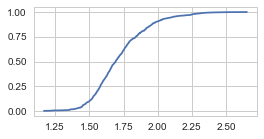

In [24]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(df['std'])
plt.plot(ecdf.x, ecdf.y)
plt_configure(figsize=(4,2))
std_standard = sp.optimize.brentq(lambda x: ecdf(x)-0.97 , 0, 4)
print(std_standard)

## 3.2 Scatter

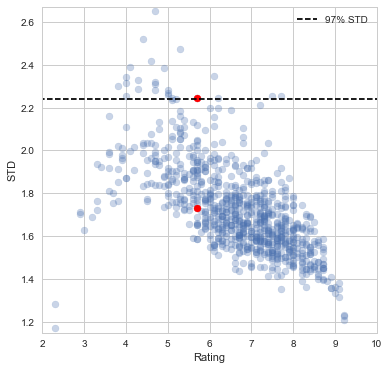

In [25]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3, label='')
plt.plot([0,10],[std_standard,std_standard], linestyle='--', color='black', label='97% STD')
sub_df = df[df['name'].str.contains("西游伏妖|杜拉拉升职记")] 
# sub_df = df[df['name'].str.contains("夏有乔木|爸爸去哪|刺客聂隐娘|一步之遥")] 
ax.scatter(sub_df.db_rating, sub_df['std'], color='red', label='') # s=80, 
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(xlabel='Rating', ylabel='STD', figsize=(6,6), legend=True)
plt.show()
# turn_scatter_into_interactive(fig, scatter_plot, df, '.\popular.html', show_ratings_num=False, click=True, show_distribution=True)

## 3.3 Big deviation movies

In [26]:
movie_list(df.sort_values(by='std',ascending=False), len=30)

## 3.4 Timeshift

In [27]:
std_925 = sp.optimize.brentq(lambda x: ecdf(x)-0.925 , 0, 4)
for year in range(2008,2017):
    sub_df = df.query("year == @year")
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.4, label='')
    ax.axis([2,10,df['std'].min(),df['std'].max()])
    plt.plot([0,10],[std_925, std_925], linestyle='--', color='black', label='92.5% STD')
    sub_df_outliers = sub_df.query("std >= @std_925")
    ax.scatter(sub_df_outliers .db_rating, sub_df_outliers ['std'], alpha=0.5, color='red', label='')
    plt_configure(title=str(year)+ ': '+ str(len(sub_df_outliers))+'/'+str(len(sub_df)), 
                  xlabel='Rating', ylabel='STD', figsize=(2.5, 2.5), legend=True)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADGCAYAAACXUs/uAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXt0VNW9xz/nnHkmkxAgDxAkBDSKYkWUAhcQC7ZQbQtI
eEWJLli9iChFnuKlFAV5tGopIKXQ6xUjVAp1LcDlxarFF7QgXEJN5KFBIJCQTMhzMpN5nLPvH0NG
wmMSkGTy2J+1WIuZfc6eb5Lznf367d9WhBACiURyRdRIC5BImjLSIBJJGKRBJJIwSINIJGGQBpFI
wiANIpGEQRrkBnHu3DmmT59O3759GTBgAPPnz6e8vDxU7vf7efHFF+nbty99+/blt7/9Lbqu17vc
5XLx/PPP069fP/r168e8efMoLS2tt7666gc4ceIEDz74IACHDh3itttuq/Xvnnvuuab6WgRC8r0J
BAJi1KhRYtKkSeLIkSPi8OHDYtSoUWLKlCmha5YvXy5+/OMfi0OHDok9e/aIAQMGiNdee63e5bNn
zxZpaWkiJydHZGdni1GjRomnnnqq3hrrql8IITIzM8XChQuFEEL89a9/FT/72c9EUVFR6F9xcfE1
1dcSkAa5AXz55ZciNTVVFBUVhd47cOCASE1NFeXl5aK6ulrcfffd4sMPPwyVv/POO6J///5C1/U6
y4UQonfv3mLnzp2h8h07dohevXrVS1996hdCiClTpoj3339fCCHE0qVLxYwZM75XfS0B2cW6AXTq
1IkNGzaQkJAQek9RFAAqKio4cuQIHo+HH/7wh6Hy++67j/Pnz3P69Ok6ywHatm3Lzp07qaysxOVy
8e6779KzZ8/Q9RMnTmTixIlX1Fef+gOBAAcPHqRfv34AfPPNN6SkpFx3fS0FU6QFtATatm3L/fff
X+u9N954g+TkZDp37kxOTg52u52YmJhQeY2Zzp07R3l5edjyrl27snjxYubMmUOfPn0AuPnmm9m8
eXPo+tWrV19VX2FhYZ31Z2Vl0a1bN2JjYwHIzc3FarXyi1/8gtLSUvr06cNzzz1HYmJiveprKcgW
pAFYv349H3zwAf/1X/8FgMfjwWq11rrGYrEA4PP56iyH4AA6JSWFjRs3snHjRmJiYpgzZw7iQihd
XFwccXFxV9RTn/r37NnDgAEDAKiqqqKgoACfz8eSJUt4+eWXyc/PZ/Lkyfj9/nrV11KQLcgN5rXX
XmPVqlUsXLiQwYMHA2Cz2S57cGpe2+32OstPnz7NkiVL2LVrF8nJyUCwxRg6dCj79++nb9++YTXV
VT8EDTJ37lwAoqOjOXDgAHa7HZMp+IisWbOGQYMGsX///nrV11KQLcgN5KWXXmL16tUsWrSIRx99
NPR+hw4dcLvduFyu0HtOpxOApKSkOsuzs7Ox2Wwhc0Bw3NO2bVvy8vLq1FVX/RUVFZw8eZJevXqF
ymNiYkLmAIiPjycuLo7CwsI662tJSIPcIP7whz/w1ltvsWzZMiZMmFCr7Pbbb8dut3Pw4MHQewcO
HCA+Pp4uXbrUWZ6UlITb7ebMmTOh8uLiYsrKyujSpUud2uqq/5///Cf33ntvyBCHDx/mnnvuqfV5
+fn5lJSU0L179zrra1FEehqtJZCTkyNuv/128dvf/rbWukFRUZHw+/1CCCEWL14shgwZIg4cOCD2
7t0rBgwYINatWxeqI1x5IBAQjzzyiBg/frz48ssvRU5Ojpg4caJIS0sLTauWlpaK0tLSq2oMV/+v
f/1r8dZbb4Wu9Xq9Yvjw4WLixImhdZ0xY8aIJ554ol71tSSkQW4Ar776qkhNTb3iv2PHjgkhgmsH
CxYsEL179xb9+vUTK1asqLVmUFe50+kUs2bNEv379xf9+vUTs2bNEufPnw+VP/bYY+Kxxx67qsZw
9Q8dOlScOHGi1vV5eXli2rRpok+fPuLee+8Vc+fOFWVlZfXW21JQhJA7CiWSqyHHIBJJGKRBJJIw
SINIJGGQBpFIwiANIpGEQRpEIglDs4/Fung1VyKpi3vvvfearm/2BoFr/6EbioMHD0otTVQHXN+X
qexiSSRhkAaRSMIgDSKRhEEaRCIJgzSIRBIGaRCJJAzSIBJJGFrEOojk+vD5fMyfP5+8vDwcDgcL
Fy6ka9euHDlyhMWLF6NpGhaLhRUrVhAfH1/r3lGjRuFwOADo3Lkzy5Yt49NPP2XVqlXcdNNNrFy5
ElVV+Z//+R+SkpLo3LnzZZ//ySef8PrrryOEoLq6mscee4xf/OIXzJo1i6KiIs6ePYvZbCYxMZHU
1FR+8pOfMGPGDG655RaEEAQCATIyMnjooYca7pcU2f1a358DBw5EWkKI5qYlMzNTLFiwQAghRG5u
rpg0aZIQQohHH31UfPXVV0IIIf7yl7+IpUuX1rqvurpajBgx4rL6pkyZIsrLy8XixYtFTk6OOHLk
iJg9e/ZVP3/w4MGivLxcCCFEZWWlGDJkSK30pqtWrRKbN28Ovf7Xv/5VK9ujy+USo0aNCmmti+v5
+zRIC+L3+3n++ec5e/YsPp+PqVOnMnTo0FD5G2+8wdatW2nXrh0AL7zwAl27dmXRokUcO3YMi8XC
kiVLamXxaA1cKeHahAkTWLZs2TWX+3w+8vPzw37eN998E0p4161bN3JzcwF49dVXSUxMBEDX9cty
YB09ehSPx8OkSZMIBALMnDmTXr16ER0dTXV1NV6vF7vdzpo1axg5cuRVPz8mJoY333yTYcOGccst
t/C///u/ofxa9SE6Oppx48axa9cuevToUe/7roUGGYPs2LGDuLg4Nm/ezJ///GcWL15cqzw7O5sV
K1aQmZlJZmYm3bp148MPP8Tn87FlyxZmzZrF8uXLG0Ka5CJ69OjB7t27EUKQlZVFYWEhuq6HzPF/
//d/vPXWWzzxxBO17rPZbEyePJn//u//5oUXXmD27NkEAgGeeuopli1bRqdOnTh9+jS9e/dm7969
LFy4kEOHDl32+a+//joej4eZM2cycOBA/vSnP4US4dWX9u3bX1OW+2ulQVqQ4cOHM2zYMACEEGia
Vqs8JyeH9evX43Q6eeCBB5gyZQoHDx5k0KBBAPTq1Yvs7OyGkNakOXny5A0rr0/c0ejRo8nNzSU9
PZ3evXtz5513hv5W7733Hn/84x9Zv359qKWvISUlheTkZBRFISUlhbi4OJxOJ927d+f3v/89uq4z
Y8YMlixZwlNPPcXGjRuZOnUqGzZsCNVRXl5Ofn4+c+bMYc6cORQWFvLMM89w5513MmTIkDq115Cf
n0+HDh3qff210iAGiY6OBoJnWkyfPp0ZM2bUKn/44YdJT0/H4XDw9NNPs3v3blwuV2jQB6BpGoFA
oFbysqvRlCJ6m5OW48ePk5CQwOzZszlx4gTZ2dkcPHiQzz//nI8++ojZs2dTVFREUVFRrfs++OAD
8vLymDRpEqWlpRQXF5OXlxfq0n3wwQfcddddZGVlIYTg0KFDFBUV1dJTVlbGwoULWbx4MW3atMEw
DEwmE6dOnQpdl5+fj9vtDr0+fvw4JSUloddut5s333yTX/3qVw32e2+wrCYFBQVMmzaN9PR00tLS
Qu8LIXC5XKHEx5s2baKsrIyKigruvvvu0IzE/fffz6efflrn5zS1aNHmpKWkpISZM2fi8XiIiYnh
pZdeIj4+nv79+9OxY8dQIus+ffowffp05s6dy4wZM4iPj2f+/Pnk5+ejKAqzZ8+md+/eQPBLccGC
BaxcuRKAqVOncv78edLT0y8bj3z00UesXbsWk8mErus88MADPP3006Hy1atXEx8fH0rEt2/fvtAs
lqqq6LpORkYGP/nJT27Y7+QyrnlYXw+cTqcYPny42Lt372VlFRUV4v777xcul0sYhiGeeeYZ8fHH
H4tdu3aJefP

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

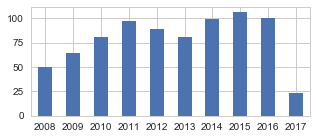

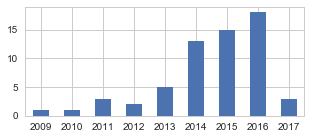

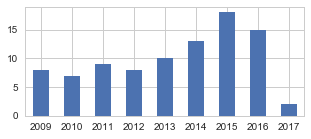

In [28]:
df.query("year >= 2008")['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(5,2))
plt.xticks(rotation=0)
# plt_configure(title='豆瓣评分超过2W的电影数量')
plt.figure()
df.query("std >= @std_925")['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(5,2))
# plt_configure(title='标准差STD在92.5%以上的电影分布')
plt.xticks(rotation=0)

plt.figure()
df.query("db_rating <= 5 ")['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(5,2))
plt.xticks(rotation=0)

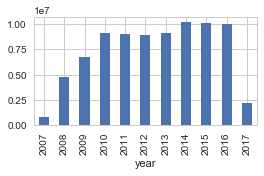

In [29]:
df.query("year >= 2007").groupby('year')['db_ratings_count'].sum().plot(kind='bar')
plt_configure(figsize=(4,2))

In [30]:
for year in range(2008, 2017, 3):
    sub_df = df.query("year >= @year & year<=@year+2")
    print(year, len(sub_df), sub_df['db_ratings_count'].max())
    sub_df['std'].hist(alpha=0.5, figsize=(4,1.8), bins=arange(df['std'].min(), df['std'].max(), 0.1))
    plt.xlim([df['std'].min(),df['std'].max()])
    plt_configure(xlabel='STD', ylabel='Frequency')
    plt.figure()
    sub_df['db_rating'].hist(bins=arange(2, 10, 0.5), alpha=0.5, figsize=(4,1.8))
    plt_configure(xlabel='Rating', ylabel='Frequency')
    align_figures()

2008 195 709045


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQ0AAACQCAYAAAASnT4hAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEK9JREFUeJzt3X1QFPUDBvDnAIHkfA11VNA8PaTGmVIUdRJ8AQdNHVIQ
gUmYMAsGRzFGQVNe0p/oYDqNIymWk2FnGmlqGTr4MhAlg5eYmq+VOnjCqODL8SJHfH9/OFyhcuwa
e3fE8/mL29u9fVyWx327XZUQQoCISCIHWwcgovaFpUFEsrA0iEgWlgYRycLSICJZWBpEJIuTkh++
detWHDt2DCaTCREREfD19UVycjJUKhW0Wi1SU1Ph4MDeImpPFPuLLS4uxunTp7Fr1y7k5OSgvLwc
GRkZSEhIgE6ngxACR48eVWr2RKQQxbY0fvzxR3h5eSE+Ph5GoxFLly7Fnj174OvrCwDw9/dHUVER
Jk+e3OJn6PV6peIRkQQ+Pj5PDVOsNKqqqmAwGLBlyxaUlZUhLi4OQgioVCoAgJubGx4+fKjU7IlI
IYqVRvfu3aHRaODs7AyNRgMXFxeUl5eb36+urkbXrl1b/ZxnNZ0ler1e9jRKs8dMAHPJYY+ZAGVz
tbSlr9gxDR8fHxQWFkIIgYqKCtTW1mLs2LEoLi4GABQUFGDkyJFKzZ6IFKLYlsbEiRNRUlKC0NBQ
CCGQkpICDw8PrFy5Ehs2bIBGo0FQUJBSsycihSh6ynXp0qVPDdu5c6eSs2z3dIcvPve0kUHebZiE
6Nl4kQQRycLSICJZWBpEJAtLg4hkYWkQkSwsDSKShaVBRLKwNIhIFpYGEcnC0iAiWVgaRCQLS4OI
ZGFpEJEsLA0ikoWlQUSysDSISBaWBhHJwtIgIllYGkQki6TSmD9/Pn744QeYTCal8xCRnZNUGu++
+y4KCwsRFBSE9PR0/Prrr0rnIiI7Jelu5KNGjcKoUaNQV1eHvLw8LFy4EGq1GqGhoYiMjISzs7PS
OYnITkh+hEFxcTH279+PoqIi+Pv744033kBRURHi4uLw2WefKZmRiOyIpNKYOHEiPDw8EBISgpSU
FLi6ugIAfH19ERoaqmjA9ujJZ5cYDPdx6c7zP8+EyJ5IKo0dO3bAzc0NL774Iurq6nD9+nUMHDgQ
jo6O2LdvX4vT3b17F7NmzcL27dvh5OSE5ORkqFQqaLVapKamwsGBJ2+I2htJf7UnTpzAO++8A+Bx
EcTGxmL37t0WpzGZTM22SjIyMpCQkACdTgchBI4ePfovoxORLUgqjT179uDLL78EAPTv3x979+5t
9fGK69atQ3h4OHr37g0AOH/+PHx9fQEA/v7++Omnn/5NbiKyEUmlYTKZmp0h6dSpk8Xx9+7di549
e8LPz888TAgBlUoFAHBzc8PDhw+fJy8R2ZikYxqBgYGIjo7G1KlTAQBHjhzBpEmTWhz/m2++gUql
ws8//4wLFy4gKSkJlZWV5verq6vRtWtXSQH1er2k8f7tNG3JYLj/jGEGxeer11c/xzS2XVYtscdc
9pgJsH4uSaWxZMkS5OXloaSkBE5OToiKikJgYGCL4zftygDA3LlzkZaWhszMTBQXF2P06NEoKCjA
mDFjJAX08fGRNF4TvV4ve5q29uSZEoPBgH79+llhvvLG/2cue3rivD38Dp9kj5kAZXO1VEaSr9MY
PHgw3N3dIYQAAJSUlGDUqFGSAyQlJWHlypXYsGEDNBoNgoKCJE9LRPZDUmmkp6fj+PHj8PT0NA9T
qVT44osvWp02JyfH/HNrB0+JyP5JKo2ioiLk5eWZT58SUccl6eyJp6enebeEiDo2SVsa3bp1w7Rp
0zB8+PBmp14zMjIUC0ZE9klSafj5+TW75oKIOi5JpTFz5kyUlZXh6tWrGDduHG7dutXsoCgRdRyS
jmkcOnQIcXFx+N///of79+8jPDwc+/fvVzobEdkhSaWxbds27Nq1y/xN13379iE7O1vpbERkhySV
hoODA9Rqtfl17969+bV2og5K0jENrVaLnTt3oqGhARcuXIBOp4O3t/1cdkxE1iNpcyElJQUVFRVw
cXHB8uXLoVarkZqaqnQ2IrJDkrY0OnfujMTERCQmJiqdh4jsnKTS8Pb2Nt8Lo0mvXr1QUFCgSCgi
sl+SSuPixb+/6m0ymZCfn4/S0lLFQhGR/ZJ9CqRTp06YOnUqTp48qUQeIrJzkrY0vv32W/PPQghc
uXKl1Vv+EdF/k6TSKC4ubva6R48e2LhxoyKBiMi+SSoNfpuViJpIKo1JkyY9dfYE+PsO43yGCVHH
Iak0ZsyYgU6dOiEsLAxOTk44ePAgzp49i8WLFyudj4jsjKTSKCwsxN69e82vo6OjMWvWLPTv31+x
YERknySfcv3nE9GOHz8ONzc3RQIRkX2TtKXx4YcfIikpCXfuPH6whkajwbp16xQNRkT2SVJpDBs2
DN9//z0qKyvh4uLCrQyiDkzS7snNmzfx9ttvIzw8HDU1NYiKikJZWZnS2YjIDkna0khJScG8efOw
fv16uLu7Y/r06UhKSmr2+MV/MplMWL58OW7evIn6+nrExcVhyJAhSE5OhkqlglarRWpqKm/kY0d0
hy+2PlIL7OmRjqQ8SX+1VVVVGDduHIDHT1YLCwuD0WhscfwDBw6ge/fu0Ol0+PTTT7Fq1SpkZGQg
ISEBOp0OQghe20HUTkkqDVdXV5SXl5sv8Dp16lSz5588acqUKVi0aBGAxxeAOTo64vz58/D19QUA
+Pv7NzsbQ0Tth6Tdk2XLluG9997DjRs3EBwcjPv37+Pjjz9ucfymA6VGoxELFy5EQkIC1q1bZy4d
Nzc3PHz4sA3iE5G1SSqNu3fvIjc3F9euXcNff/0FjUZjcUsDAG7duoX4+HhERkZixowZyMzMNL9X
XV2Nrl27SgrY0uPu23qatmQw3H/GMIMNkrSuLXLp9dVtkOTJz7Tt7/BZ7DETYP1ckkojMzMTEyZM
gFarlfShd+7cQUxMDFJSUjB27FgAwCuvvILi4mKMHj0aBQUFGDNmjKTP8vHxkTReE71eL3uatnbp
TvODigaDAf369bNRmpa1VS4fn7Y9EGoPv8Mn2WMmQNlcLZWRpNLw9PTEsmXL8OqrrzZ7cvybb775
zPG3bNmCBw8eICsrC1lZWQCADz74AKtXr8aGDRug0WgQFBQk999ARHbAYmlUVFSgT58+6NGjBwDg
zJkzzd5vqTRWrFiBFStWPDV8586dz5uTiOyExdKIjY3Fvn37kJGRge3btyMmJsZauWzu31y3QPRf
ZvGUqxDC/PPBgwcVD0NE9s9iafzzxjv/LBAi6rgkX8f9rDt3EVHHY/GYxpUrVxAQEADg8UHRpp95
mz+ijstiaRw+fNhaOYionbBYGrydHxE9id9NJyJZWBpEJAtLg4hkYWkQkSwsDSKShaVBRLKwNIhI
FpYGEcki6SY8RJbw8QcdC7c0iEgWlgYRycLSICJZWBpEJAsPhJJNPesgqsFw/6nHQDwLD6LaBrc0
iEgWlgYRycLSICJZWBpEJItVD4Q2NjYiLS0Nly5dgrOzM1avXo2BAwcqMi8+7IhIGVYtjfz8fNTX
12P37t0oLS3F2rVr8cknn1icRu4fv9Qj70T0fKy6e6LX6+Hn5wcAeO2113Du3Dlrzp6I2oBVtzSM
RiPUarX5taOjIxoaGuDk1HKMoe7VsuYx1L0bAHnTKM0eMwHtP5der1c+jA3nJ5W1c1m1NNRqNaqr
/14ZGhsbLRaGj4+PNWIRkQxW3T0ZMWIECgoKAAClpaXw8vKy5uyJqA2ohBWf7Nx09uTy5csQQmDN
mjUYPHiwtWZPRG3AqqVBRO0fL+4iIllYGkQkS7v7avyZM2ewfv165OTkNBv+3XffYceOHXB0dISX
lxfS0tLg4OC

2011 267 541444


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQ0AAACOCAYAAAArQV3KAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAED1JREFUeJzt3X1QFPUfB/D38XCQ4M+HMMcETRSkxplSfCwRFRw0dVBB
5JiECbNgcBRjDDU9oUx0sJzGkRSnJsMwizS1HHTwYSBMBk1NzedSBxFHBLXjQY74/v5w2ETx2EX2
bg/er7/udrndj3vr+/bhu9+vTgghQEQkk4OtCyAi+8LQICJFGBpEpAhDg4gUYWgQkSIMDSJSxMnW
BVhy/PhxW5dA1KH5+/s/MU3ToQE0X7Qlx48fV/wZtWmxJoB1KaHFmgB163rajzZPT4hIEYYGESnC
0CAiRTR/TaOjyd53vtWfjQrxa8NKiJrHIw0iUoShQUSKMDSISBGGBhEpwtAgIkUYGkSkCEODiBRh
aBCRIgwNIlKEoUFEijA0iEgRVZ892bRpEw4ePAiz2QyDwYDhw4dj8eLF0Ol08PHxwYoVK+DgwNwi
sieq/Y8tKirCiRMnsG3bNmRlZaGsrAxpaWlITExEdnY2hBA4cOCAWqsnIpWoFhq//vorfH19kZCQ
gLi4OIwdOxZnz57F8OHDAQBjxozBkSNH1Fo9EalEtdOTyspKlJaWYuPGjSgpKUF8fDyEENDpdAAA
Nzc3/PPPPy0upzX9hGqxb1G5NZWW3nuGdVS14jPa21aANuvSYk2A9etSLTS6du0Kb29v6PV6eHt7
w8XFBWVlZdL8qqoq/O9//2txOR2tj9AL5a3vT8PfX1l/GlrcVoA269JiTUA76yPU398fBQUFEELg
1q1bqKmpwahRo1BUVAQAyM/Px9ChQ9VaPRGpRLUjjXHjxqG4uBjh4eEQQsBoNMLT0xPLly/HZ599
Bm9vb4SEhKi1eiJSiaq3XD/44IMnpm3dulXNVRKRymSFxty5czFjxgwEBwfD2dlZ7ZqolZT2L1pa
ek+6hsL+RUkuWdc03n33XRQUFCAkJASpqan4448/1K6LiDRK1pHGsGHDMGzYMNTW1iI3Nxfz58+H
u7s7wsPDERUVBb1er3adRKQRsq9pFBUVYdeuXSgsLMSYMWPw5ptvorCwEPHx8fjyyy/VrJGINERW
aIwbNw6enp4ICwuD0WiEq6srAGD48OEIDw9XtUAi0hZZobFlyxa4ubnh+eefR21tLa5du4a+ffvC
0dERO3fuVLtGItIQWRdCDx8+jHfeeQcAcOfOHcTFxWH79u2qFkZE2iQrNL7//nt8++23AIDevXtj
x44dbG9B1EHJCg2z2dzkDgnbahB1XLKuaQQHByMmJgaTJk0CAOzfvx/jx49XtTAi0iZZobFo0SLk
5uaiuLgYTk5OiI6ORnBwsNq1EZEGyW6n0b9/f3h4eEAIAQAoLi7GsGHDVCuMiLRJVmikpqbi0KFD
8PLykqbpdDp88803qhVGRNokKzQKCwuRm5srNeoioo5L1t0TLy8v6bSEiDo2WUcaXbp0weTJkzF4
8OAmt17T0tJUK4yItElWaAQEBCAgIEDtWojIDsgKjenTp6OkpASXL1/G6NGjcfPmzSYXRYmo45B1
TWPv3r2Ij4/HJ598gnv37iEyMhK7du1q8XN37txBYGAgrly5gmvXrsFgMCAqKgorVqxAQ0PDMxdP
RNYnKzQ2b96Mbdu2SU+67ty5E5mZmRY/YzabmzxGz9HViNoHWacnDg4OcHd3l96/8MILLY7BumbN
GkRGRkrh8vjoaoWFhZgwYUJr69a0x/vqfLQvTiJ7Jys0fHx8sHXrVtTX1+PcuXPIzs6Gn9/TO6Ld
sWMHunfvjoCAACk0WjO6GmCfI6w1N0paaWmpDSppWWNdrRmdTU22/g6bo8WaAI2OsGY0GvHFF1/A
xcUFS5cuxciRI5GcnPzUv//xxx+h0+nw22+/4dy5c0hOTkZFRYU0X+7oaoB9jrD2+FFFaWkpXnzx
RRtV83SP1qV0dDY1aeE7fJwWawJsM8KarNDo1KkTkpKSkJSUJGtljX1vAMDs2bORkpKC9PR0FBUV
YcSIEcjPz8fIkSNlLYuItEVWaPj5+UmnFo169OiB/Px82StKTk7m6GpE7YCs0Dh//r/DbbPZjLy8
PJw8eVLWCrKysqTX7O1Lu5QOtPQoDrTUsSgeANrZ2RmTJk3C0aNH1aiHiDRO1pHGTz/9JL0WQuDS
pUvs8o+og5IVGkVFRU3ed+vWDevWrVOlICLSNlmhwadZiaiRrNAYP378E3dPgP8abLFJOFHHISs0
pk6dCmdnZ0RERMDJyQl79uzB6dOnsXDhQrXrIyKNkRUaBQUF2LFjh/Q+JiYGM2bMQO/evVUrjIi0
SXZv5EeOHMHrr78OADh06BDc3NxUK4rsC9t4dCyyQuOjjz5CcnIyysvLAQDe3t5Ys2aNqoURkTbJ
Co1Bgwbhl19+QUVFBVxcXHiUQdSByWoReuPGDbz99tuIjIxEdXU1oqOjUVJSonZtRKRBskLDaDRi
zpw56NSpEzw8PDBlyhSLj8YTUfslKzQqKysxevRoAA9HVouIiIDJZFK1MCLSJlmh4erqirKyMqmB
17Fjx5qMf0JEHYesC6FLlizBe++9h+vXryM0NBT37t3D559/rnZtRKRBskLjzp07yMnJwdWrV/Hv
v//C29ubRxpEHZSs05P09HQ4OzvDx8cHfn5+DAyiDkzWkYaXlxeWLFmCV199tcnI8dOmTVOtMCLS
JouhcevWLfTs2RPdunUDAJw6darJ/KeFhtlsxtKlS3Hjxg3U1dUhPj4eAwYMwOLFi6HT6eDj44MV
K1a0OHYKEWmPxdCIi4vDzp07kZaWhq+++gqxsbGyFrp792507doV6enpuHv3LqZNmwY/Pz8kJiZi
xIgRMBqNOHDgQLsdLImoPbP4Uy+EkF7v2bNH9kInTpyIBQsWSMtwdHR8YoS1I0eOtKZeIrIxi0ca
j3a882iAtKTx2RSTyYT58+cjMTERa9as4QhrGmTrup42sputv8PmaLEmQKMjrAFotucuS27evImE
hARERUVh6tSpSE9Pl+ZxhDVt0EJdzY3spoXv8HFarAnQ4Ahrly5dQlBQEICHF0UbX7fUzV95eTli
Y2NhNBoxatQoAMArr7zCEdaI2gGLobFv375WLXTjxo24f/8+MjIykJGRAQD48MMPsXLlSo6wRmTn
LIZGa7vzW7ZsGZYtW/bEdI6wRmT/2FCCiBRhaBCRIgwNIlKEoUFEijA0iEgRhgYRKcLQICJFZDcj
72ieZdQwovaMRxpEpAhDg4gUYWgQkSIMDSJShBdCyaaau+BcWnrviT5JmhMV8mRfHKQ+hgbZrWe5
w8XAaT2enhCRIgwNIlKEoUFEijA0iEgRq14IbWhoQEpKCi5cuAC9Xo+VK1eib9++qqyLzcDJEqX7
h9w7Oi1pDxdgrXqkkZeXh7q6Omzfvh1JSUlYvXq1NVdPRG3AqqFx/PhxBAQEAABee+01nDlzxpqr
J6I2YNXTE5PJBHd3d+m9o6Mj6uvr4eT09DJaO8LaQI9WlaiKgR5dADQ/kpgtsS752qomNUZD0+wI
a23B3d0dVVX/bfiGhgaLgaHFEa2IOjqrnp4MGTIE+fn5AICTJ0/C19fXmqsnojagE0pGdn5GjXdP
Ll68CCEEVq1ahf79+1tr9UTUBqwaGkRk/9i4i4gUYWgQkSJ292j8qVOnsHbtWmRlZTWZ/vPPP2PL
li1wdHSEr68vUlJS4ODggOnTp0u3eT09PZGWlmbVur7++mv88MMP6N69OwAgNTUVL730klVaxjZX
0+3bt/H+++9L78+dO4ekpCQYDAbVt5XZbMbSpUtx48YN1NXVIT4+HkFBQdL8gwcPYsOGDXByckJY
WBgiIiKs0oq

2014 305 456853


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQ0AAACQCAYAAAASnT4hAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEMtJREFUeJzt3XtQVOUfBvBnAYEEr2GOCpprIDXOlK6iToIXcNDUIQUR
mIQJs2BwFGMUNeWS/kQH02kcGcVyMmhNI00tQwcvA1EyuKmpea3UwRVGBS/LRZZ4f384bqGynmOc
s7vyfP7aPZc9Xw6Hh/ec9z1nNUIIASIiiZxsXQARORaGBhHJwtAgIlkYGkQkC0ODiGRhaBCRLC5K
fvimTZtw6NAhmM1mREdHIyAgAIsWLYJGo4Gvry/S09Ph5MTcInIkiv3FlpWV4fjx49i2bRvy8vJQ
WVmJrKwsJCcnQ6/XQwiBgwcPKrV5IlKIYi2Nn376CX5+fkhKSoLJZMLChQuxY8cOBAQEAACCgoJQ
WlqK8ePHt/oZBoNBqfKISAKdTvfYNMVCo6amBkajERs3bkRFRQUSExMhhIBGowEAeHh44N69e0pt
nogUolhodO3aFVqtFq6urtBqtXBzc0NlZaVlfm1tLTp37vzUz3lS0lljMBhkr6M0e6wJYF1y2GNN
gLJ1tdbSV+yahk6nQ0lJCYQQqKqqQn19PUaOHImysjIAQHFxMYYOHarU5olIIYq1NMaOHYvy8nJE
RERACIG0tDR4e3tj2bJlWLt2LbRaLUJDQ5XaPBEpRNEu14ULFz42LT8/X8lNOjz9/nPPvG5MqH8b
VkL0ZBwkQUSyMDSISBaGBhHJwtAgIlkYGkQkC0ODiGRhaBCRLAwNIpKFoUFEsjA0iEgWRYeRk7rk
DkE3Gu/g/M0H63AIOknFlgYRycLQICJZGBpEJAtDg4hkYWgQkSzsPSEAfPgPSceWBhHJwtAgIlkk
hcbs2bPx448/wmw2K10PEdk5SaHx/vvvo6SkBKGhocjMzMRvv/2mdF1EZKckXQgdNmwYhg0bhoaG
BhQWFmLu3Lnw9PREREQEYmJi4OrqqnSdRGQnJPeelJWVYffu3SgtLUVQUBDeeustlJaWIjExEZ9/
/rmSNRKRHZEUGmPHjoW3tzfCw8ORlpYGd3d3AEBAQAAiIiIULZCI7Iuk0Ni6dSs8PDzw4osvoqGh
AVeuXEG/fv3g7OyMXbt2tbrerVu3MG3aNGzZsgUuLi5YtGgRNBoNfH19kZ6eDicndt4QORpJf7VH
jhzBe++9B+BBECQkJGD79u1W1zGbzS1aJVlZWUhOToZer4cQAgcPHvyPpRORLUhqaezYsQM7duwA
APTp0wc7d+5EZGQkZsyY0eo6q1evRlRUFHJzcwEAZ86cQUBAAAAgKCgIpaWlGD9+/H+tn+wAR5O2
L5JaGmazuUUPSYcOHawuv3PnTnTv3h2BgYGWaUIIaDQaAICHhwfu3bv3LPUSkY1JammEhIQgLi4O
EydOBAAcOHAA48aNa3X5b7/9FhqNBr/88gvOnj2L1NRUVFdXW+bX1taic+fOkgo0GAySlvuv6yhN
ak1G4x2FK3l0e0ZVt/cog6G2lemO+ztUm9p1SQqNBQsWoLCwEOXl5XBxcUFsbCxCQkJaXf6rr76y
vJ45cyYyMjKQnZ2NsrIyDB8+HMXFxRgxYoSkAnU6naTlHjIYDLLXUZqcmh4+fk8NRqMRvXv3Vm17
T6LTPX564ui/QzUpWVdrYSR5nMaAAQPg5eUFIQQAoLy8HMOGDZNcQGpqKpYtW4a1a9dCq9UiNDRU
8rpEZD8khUZmZiYOHz4MHx8fyzSNRoMvv/zyqevm5eVZXufn5z9DiURkTySFRmlpKQoLCy3dp0TU
fknqPfHx8bGclhBR+yappdGlSxdMmjQJgwcPbtH1mpWVpVhhRGSfJIVGYGBgizEXRNR+SQqNqVOn
oqKiApcuXcKoUaNw/fr1FhdFiaj9kHRNY9++fUhMTMT//vc/3LlzB1FRUdi9e7fStRGRHZIUGps3
b8a2bdssd7ru2rXLck8JEbUvkkLDyckJnp6elvcvvfQSb2snaqckXdPw9fVFfn4+mpqacPbsWej1
evj78+5EovZIUnMhLS0NVVVVcHNzw5IlS+Dp6Yn09HSlayMiOySppdGxY0ekpKQgJSVF6XqIyM5J
Cg1/f3/LszAe6tGjB4qLixUpiojsl6TQOHfun9u1zWYzioqKcOLECcWKcnSPPsnKaLyj6i3vREqS
3QXSoUMHTJw4EUePHlWiHiKyc5JaGt99953ltRACFy9efOoj/4jo+SQpNMrKylq879atG9atW6dI
QURk3ySFBu9mJaU86UnmUq8B8UnmtiEpNMaNG/dY7wnwzxPG+R0mRO2HpNCYMmUKOnTogMjISLi4
uGDv3r04deoU5s+fr3R9RGRnJIVGSUkJdu7caXkfFxeHadOmoU+fPooVRkT2SXKX688//2x5ffjw
YXh4eChSEBHZN0ktjY8//hipqam4efMmAECr1WL16tWKFkZE9klSaAwaNAg//PADqqur4ebmxlYG
UTsm6fTk2rVrePfddxEVFYW6ujrExsaioqJC6dqIyA5JvjV+1qxZ6NixI7y8vDB58mSkpqa2urzZ
bMaCBQsQExODiIgIHDx4EFeuXEF0dDRiYmKQnp6O5ubmNvshiEg9kkKjpqYGo0aNAvDgm9UiIyNh
MplaXX7Pnj3o2rUr9Ho9PvvsMyxfvhxZWVlITk6GXq+HEIJjO4gclKTQcHd3R2VlpWWA17Fjx1p8
/8mjJkyYgHnz5gF4MADM2dkZZ86cQUBAAAAgKCioRW8METkOSRdCFy9ejA8++ABXr15FWFgY7ty5
g08//bTV5R9eKDWZTJg7dy6Sk5OxevVqS+h4eHjg3r17bVA+EalNUmjcunULBQUFuHz5Mv7++29o
tVqrLQ0AuH79OpKSkhATE4MpU6YgOzvbMq+2thadO3eWVGBrX3ff1uu0JaPxzhOmGW1QydM5cl0G
Q60Klfx7e7Y9rlqjdl2SQiM7OxtjxoyBr6+vpA+9efMm4uPjkZaWhpEjRwIAXnvtNZSVlWH48OEo
Li7GiBEjJH2WTqeTtNxDBoNB9jpt7dGbrYxGI3r37m2jalrn6HXpdOrdsGYPx9WTKFlXa2EkKTR8
fHywePFivP766y2+Of7tt99+4vIbN27E3bt3kZOTg5ycHADARx99hBUrVmDt2rXQarUIDQ2V+zMQ
kR2wGhpVVVXo2bMnunXrBgA4efJki/mthcbSpUuxdOnSx6bn5+c/a51EZCeshkZCQgJ27dqFrKws
bNmyBfHx8WrVRUR2ymqXqxDC8nrv3r2KF0NE9s9qaPz7wTv/DhAiar8k3xr/pCd3EVH7Y/WaxsWL
FxEcHAzgwUXRh6/5mD+yB096vqhUfL7os7MaGvv371erDiJyEFZDg4/zI6JHyf6GNSJq3xgaRCQL
Q4OIZJF07wnR80Zuz8u/v/Wtvfe8sKVBRLIwNIhIFoYGEcnC0CAiWXghlEim9j58nS0NIpKFoUFE
svD0pBX/pQlK9DxjS4OIZGFoEJEsDA0ikoWhQUSyPLcXQnkhk+zR8zDGgy0NIpJF1ZZGc3MzMjIy
cP78ebi6umLFihXo16+f1XX+yy3MRM+TJ/0tSD3e27KVompLo6ioCI2Njdi+fTtSUlKwatUqNTdP
RG1A1dAwGAwIDAwEALzxxhs4ffq0mpsnojag6umJyWSCp6en5b2zszOamprg4tJ6GQO9amVtY6BX
FwDy1lGaPdYEsC457LEmQHpdBoOhzbapamh4enqitvafH7C5udlqYOh0OjXKIiIZVD09GTJkCIqL
iwEAJ06cgJ+fn5qbJ6I2oBEqfrPzw96TCxcuQAiBlStXYsCAAWptnojagKqhQUSOj4O7iEgWhgYR
yeJw956cPHk

# 4. Cluster analysis

In [31]:
X = df[['1_star','2_star','3_star','4_star','5_star']].as_matrix()

In [32]:
# # Meanshift
# from sklearn.cluster import MeanShift, estimate_bandwidth
# bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=500)
# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# ms.fit(X)
# labels = ms.labels_
# cluster_centers = ms.cluster_centers_
# n_clusters = len( np.unique(labels))
# df['cluster'] = ms.labels_
# print("number of estimated clusters : %d" % n_clusters)

In [33]:
# from sklearn.cluster import DBSCAN

# db = DBSCAN(eps=0.02, min_samples=3).fit(X)
# labels = db.labels_
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# print("number of estimated clusters : %d" % n_clusters_)
# df['cluster'] = db.labels_

In [34]:
# K Means
from sklearn.cluster import KMeans

n_clusters = 7
kmeans_model = KMeans(n_clusters=n_clusters, random_state=1).fit(X)
df['cluster'] = kmeans_model.labels_
cluster_centers = kmeans_model.cluster_centers_

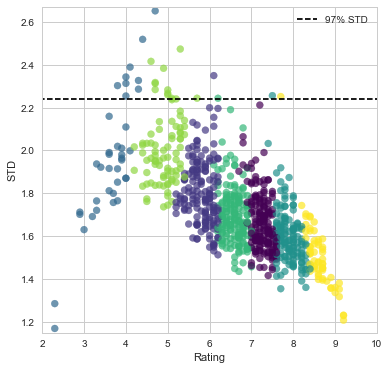

In [35]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df['db_rating'], df['std'], c=df['cluster'], alpha=0.7, cmap='viridis', label='')
plt.plot([0,10],[std_standard, std_standard], linestyle='--', color='black', label='97% STD')
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(xlabel='Rating', ylabel='STD', figsize=(6,6), legend=True)
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, df, '.\clusters.html', show_ratings_num=False, click=True, show_distribution=True)

## 4.2 Cross validation of the number of clustering

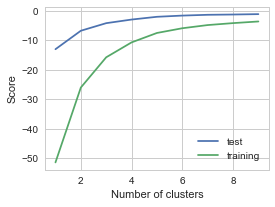

In [36]:
from sklearn.model_selection import GridSearchCV

cluster_range = arange(1,10)
grid = GridSearchCV(KMeans(random_state=1), {'n_clusters': cluster_range}, cv=5, n_jobs=-1) 
grid.fit(X)

plt.plot(cluster_range, grid.cv_results_['mean_test_score'], label='test')
plt.plot(cluster_range, grid.cv_results_['mean_train_score'], label='training')
plt_configure(figsize=(4,3), xlabel='Number of clusters', ylabel='Score', legend=True)

## 4.3 Cluster centroids

In [37]:
def prettyfloat(float):
    return "%0.1f" % float

In [38]:
def std_for_distribution(distribution, average):
    std = (distribution[0]*(2-average)**2+distribution[1]*(4-average)**2+distribution[2]*(6-average)**2+\
            distribution[3]*(8-average)**2+distribution[4]*(10-average)**2)**0.5
    return std

In [39]:
vmin, vmax = df['cluster'].min(), df['cluster'].max()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.cm.get_cmap('viridis')
colors = cmap(norm(arange(vmin, vmax+1)))

In [40]:
x=arange(1,6) # 5 rating types
cluster_rating, cluster_std = [], []
for cluster, color in zip(cluster_centers, colors):
    plt.figure()
    rating_avg=np.dot(cluster, arange(2,12,2))
    std = std_for_distribution(cluster, rating_avg)
    plt.bar(x, cluster, alpha=0.7, color=color)
    plt.ylim([0,0.5*1.1])
    cluster_rating.append(rating_avg)
    cluster_std.append(std)
    plt_configure(title='Rating: '+prettyfloat(rating_avg)+', '+prettyfloat(std), figsize=(3.5,2.5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOYAAAC4CAYAAAD37pA8AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEN9JREFUeJzt3X9M1PUfB/AncJ3CoSEDXS1kgmjljwE6N2aGhqJh/FAo
ULqjqVNzpqn5cxPPMISvWpagTs1Q0sFCRugwUyNdOElRSUShyJCUCSiEB+IJ9/n+4bxSlDu4O+8t
93z8BXefH09wTz4fjrevs5MkSQIRCcXe2gGIqD0Wk0hALCaRgFhMIgGxmEQCYjGJBCSzdoDnyVtv
vYXr168/8piTkxNeffVVLFu2DH5+fkYdp6mpCXl5eXj33XcBACtWrEBzczO++uors2d+nFKpxK+/
/tru8VdeeQXHjx9/4j45OTnYvn07bty4AS8vLyxatAiBgYGdPve1a9cQFhaGgoICKBQKs+XrliQy
2rhx46Tt27dLNTU1Uk1NjXTz5k2puLhYiouLk0aNGiXduXPHqONs2bJFmjJliv7zxsZG6Z9//rFU
7EfU19fr89fU1EiXLl2SfH19pfT09CduX1BQIA0ZMkTKzs6Wrl27Ju3cuVMaMmSI9Mcff3TqvFVV
VVJwcLA0aNAgSaPRmC1fd8Vb2U5SKBRwd3eHu7s7+vbti+HDhyMpKQkNDQ0oLCw06hjSY2s6evXq
hd69e1sibjsuLi76/O7u7khJSYGfnx/ef//9J25fW1uLefPmYcqUKfDw8MCsWbPg5OSE8+fPG33O
gwcPIjIyEo6OjmbP113xVtYM5HI5AMDBwQEA0NzcjP/97384duwY6uvr4ebmhmnTpmHu3LnIzs5G
SkoKAGDw4ME4fvw4UlJS9Ley2dnZ+Pbbb/H2228jLS0NTU1NCAoKQkJCApycnAAAeXl5+PLLL1Fd
XY2AgAB4eHhAo9EgKSkJf//9N4KCgrB+/XpMnTq1w9xnz57FiRMn8P333z91m/DwcP3HWq0WBw4c
QEtLC/z9/Y3+/uTn52Pp0qXw8PCASqUyej9j8nVXLKaJbt++jc8++wzu7u4YOXIkAGD9+vW4ePEi
tm7dij59+uDIkSPYsGED3nzzTYSEhOD333/HqVOnsGvXLri6urY7Znl5Ofr164c9e/bg+vXrWLBg
AYYNG4YPPvgA586dw9KlS7Fs2TKMGTMGOTk52LFjByIiIgAAL730En755Rf06tXLYPZt27Zh0qRJ
GDhwoMFti4uLERMTA51Oh8WLF8PLy8vo79Hnn38OAEbfUXQlX3fDYnZSUlISNm3aBADQ6XRoa2vD
yJEj8c0338DZ2RkA4O/vj5iYGAwZMgQAMGvWLKSmpqK8vByvv/46nJyc4ODgAHd39yee4/79+0hI
SICbmxsGDhyIMWPG4OLFiwCAffv2Ydy4cYiLiwMALF68GKdPn9bv29Fx/6uyshIFBQXIysoy6uv2
8PBAdnY2zp49i+TkZPTr10//w8ASOpuvu2ExO2nOnDkICwuDVqvF/v37cfToUcyfPx8+Pj76bSIi
IpCfn4/c3FxcvXoVly9fRnNzM3Q6nVHnUCgUcHNz03/u7OyM5uZmAEBZWRlCQ0Mf2d7X1xeNjY2d
+joOHz4Mb29vDB061KjtXV1d4erqitdeew0VFRXYu3evRYvZ2XzdDV/86aQ+ffrA09MTPj4+WLNm
DUaMGIEPP/wQ1dXV+m1WrVoFtVqNHj16IDw8HBkZGZ16ceeFF1546nMymczognfkxIkTmDBhgsHt
zp8/j0uXLj3ymI+PDxoaGkzO0BFj83VXLKaJ1qxZAwcHB6jVagBAfX09srOzkZycjMWLF2Py5MmQ
y+W4c+eO/tVYOzu7Lp/Px8enXVEe3uYaq7W1FSUlJRg1apTBbffv34+NGzc+8lhJSYlFf+/rTL7u
isU0kaurK5YsWYKff/4Zx44dg7OzMxQKBY4ePYqqqioUFRXho48+giRJ0Gq1AB4sSqirq0NVVRVa
W1s7dT6VSoX8/Hzs3bsXf/31F1JSUnDu3Dl92dva2lBbW4uWlpanHuPq1avQarVPLNfj+8fGxqKw
sBA7d+5EZWUl0tLScPDgQcybN8/o83XkSft3lM9WsJhmEBUVBT8/PyQmJqK1tRWbNm3CqVOnMHny
ZCxfvhyjR49GYGCg/ko3ceJEKBQKhISEoLS0tFPnGjZsGBITE5GWlobQ0FCUlpYiKChIf/tbXV2N
N954A3l5eU89Rl1dHYAHfzN83OP7+/r6IjU1FYcOHUJoaCiysrKwefNm+Pr6Gn2+jjxp/47y2Qo7
6fG/dpPQfvvtNygUCnh7e+sfmz17NoYPH4758+dbJdOuXbvw8ssvIyQkxCrn7454xXzOXLhwATNn
zsSZM2dw/fp1ZGZm4vTp0wgODrZKHo1Gg7y8PAQEBFjl/N0Vr5jPmdbWVmzcuBGHDh1CY2MjvL29
sXDhQowdO9ZqmbRarX71E5kHi0kkIN7KEgmIxSQSEItJJKBnvla2qKjoWZ+SSGgjRoxo95hVFrE/
KYi5FBUVWfT4XcFMxrHFTE+7UPFWlkhALCaRgFhMIgGxmEQCYjGJBMRiEgmIxSQSkMG/Y+p0OqjV
apSVlUEul2PdunXw9PTUP5+WlobvvvtOP4Zx7dq1nRptSETtGSzmsWPHoNVqkZmZiQsXLiApKQnb
tm3TP19SUoLk5GSbnWZGZAkGi1lUVIQxY8YAeDBmoqSk5JHnL126hB07dqC2thZjx47FnDlzLJOU
yIYYLKZGo9EPMgYeDBRubW2FTPZg18mTJ2P69OlwdnbG/PnzkZ+fj3HjxnV4TEuvlxVxPS4zGYeZ
HjBYTGdnZzQ1Nek/1+l0+lJKkoS4uDj9OP7AwECUlpYaLCbXylofMxlH2LWy/v7+OHnyJIAH82YG
DRqkf06j0eCdd95BU1MTJElCYWEhf9ckMgODV8wJEyagoKAAMTExkCQJiYmJOHjwIJqbmxEdHY1F
ixZBpVJBLpcjICCgS29oSkSPMlhMe3t7fPrpp4889t/RiRERERZ9DwsiW8QFBkQCYjGJBMRiEgmI
xSQSEItJJCAWk0hALCaRgFhMIgGxmEQCYjGJBMRiEgmIxSQSEItJJCAWk0hALCaRgKzyNnzUfa0O
S+ryvg0NDchxOdqlfRNyV3T5vCLiFZNIQAaLqdPpEB8fj+joaCiVSlRWVj5xu9WrV2Pjxo1mD0hk
iwwW878Dn5csWYKkpPa3KhkZGSgvL7dIQCJbZLCYhgY+nzt3DsXFxYiOjrZMQiIbZNLA55qaGqSm
piIlJQWHDx82+qQc+CwGS2RqaGiwyv6W/P4+dwOff/jhB9TX12P27Nmora1FS0sLvLy8MHXq1A6P
yYHP1mepTF19VRV4UEoXF5cu7Wup76+1Bj4bLKa/vz/y8/MREhLSbuCzSqWCSqUCAGRnZ+PPP/80
WEoiMszkgc9EZH4mD3x+iFdKIvPhAgMiAbGYRAJiMYkExEXszzEuGO++eMUkEhCLSSQgFpNIQCwm
kYBYTCIBsZhEAmIxiQTEYhIJiMUkEhCLSSQgFpNIQCwmkYBMnit75MgRREZGIioqCnv27LFYUCJb
YtJc2ba2NmzatAlpaWnIzMzE/v37cfv2bYsGJrIFBv/bV0dzZR0cHJCXlweZTIZbt25Bp9NBLpdb
Li2RjTB4xXzaXNmHZDIZfvzxR4SHh2PUqFFwdHS0TFIiG2LSXNmHgoODMX78eKxYsQI5OTmIjIzs
8Jgc+GweIg5XFjGTqYQc+NzRXFmNRoO5c+di9+7dkMvlcHR0hL294Rd6OfDZPEQcrixiJlMIO/DZ
0FzZ0NBQxMbGQiaTYfDgwQgLCzN7eCJbY/Jc2ejoaA5+JjIzLjAgEhCLSSQgFpNIQCwmkYBYTCIB
sZhEAmIxiQT

In [41]:
target_ids = [0,2]

5.47155263158 2.5950216344


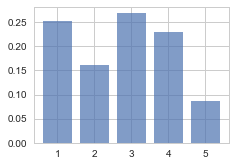

In [42]:
mix_dis = (kmeans_model.cluster_centers_[target_ids[0]] + kmeans_model.cluster_centers_[target_ids[1]])*0.5
rating_avg=np.dot(mix_dis, arange(2,12,2))
std = std_for_distribution(mix_dis, rating_avg)
print(rating_avg, std)
plt.bar(x, mix_dis, alpha=0.7)
plt_configure(figsize=(3.5,2.5))

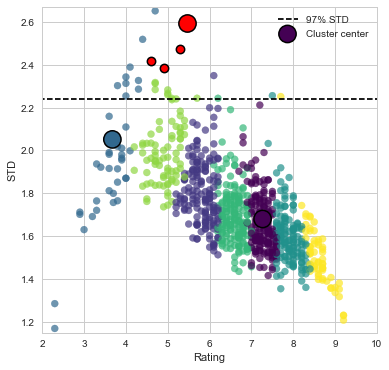

In [43]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df['db_rating'], df['std'], c=df['cluster'], alpha=0.7, cmap='viridis', label='')
ax.scatter([cluster_rating[i] for i in target_ids] , [cluster_std[i] for i in target_ids], 
           color=[colors[i] for i in target_ids], 
            label='Cluster center',
           s=300, edgecolor='black', lw = 1.5)
ax.scatter(rating_avg, std, 
           s=300, facecolor='red', edgecolor='black', lw = 1.5)
sub_df = df[df['name'].str.contains("小团圆|小时代4|长城")] 
ax.scatter(sub_df.db_rating, sub_df['std'], label='',
           s=70, edgecolor='black',facecolor='red', lw=1.5) 
plt.plot([0,10],[std_standard, std_standard], linestyle='--', color='black', label='97% STD')
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(xlabel='Rating', ylabel='STD', figsize=(6,6), legend=True)

In [44]:
for cluster in arange(0, n_clusters):
    display(movie_list(df.query('cluster == @cluster').sort_values(by='std',ascending=False), len=4))

## 4.4 Misc analysis

In [45]:
# sub_df = df[df['name'].str.contains("西游")]
# movie_list(sub_df.sort_values(by='std',ascending=False))

In [46]:
df[df['name'].str.contains("大话天仙")]

,1_star,2_star,3_star,4_star,5_star,movie_tt_id,image_url,db_rating,db_ratings_count,name,douban_url,year,mode,std,std2,avg,diff,cluster
1378,0.661,0.231,0.081,0.012,0.015,,https://img3.doubanio.com/view/movie_poster_co...,3.0,23184,大话天仙,https://movie.douban.com/subject/4913222/,2014,2,1.629724,1.900526,2.978,0.022,2


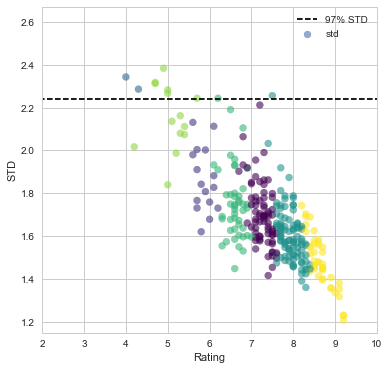

In [47]:
sub_df = df.query("db_ratings_count > 100000")
fig, ax = plt.subplots()
scatter_plot = ax.scatter(sub_df['db_rating'], sub_df['std'], c=sub_df['cluster'], alpha=0.6, cmap='viridis')
plt.plot([0,10],[std_standard, std_standard], linestyle='--', color='black', label='97% STD')
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(xlabel='Rating', ylabel='STD', figsize=(6,6), legend=True)
plt.show()
# turn_scatter_into_interactive(fig, scatter_plot, sub_df, '.\clusters2.html', show_ratings_num=False, click=True, show_distribution=True)